In [155]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

#import iris
#import iris.iterate
#import iris.coords
#import iris.plot as iplt
import gsw

In [2]:
# load ROMS avg output
for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    ds = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_21yr/ocean_avg_00' + mm + '.nc')
    print(ds.variables["temp"].shape)
    temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
    salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
    shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
    ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
    
    ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])
    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho_tmp = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
        print("Vtransform=1")
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_rho
        print("Vtransform=2")
        Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
        z_w_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_w
        
    z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
    z_w_avg = np.nanmean(z_w_tmp,axis=0)
    
    # concatanate monthly avgs into a yearly variable
    if mm == '01':
        temp = temp_tmp
        salt = salt_tmp
        shflux = shflux_tmp
        ssflux = ssflux_tmp
        z_rho = z_rho_avg
        z_w = z_w_avg
    elif mm == '02':
        temp = np.stack((temp,temp_tmp), axis=0)
        salt = np.stack((salt,salt_tmp), axis=0)
        shflux = np.stack((shflux,shflux_tmp), axis=0)
        ssflux = np.stack((ssflux,ssflux_tmp), axis=0)
        z_rho = np.stack((z_rho,z_rho_avg), axis=0)
        z_w = np.stack((z_w,z_w_avg), axis=0)
    else:
        temp_tmp_4thdim = np.expand_dims(temp_tmp, axis=0)
        temp = np.concatenate((temp,temp_tmp_4thdim), axis=0)
        salt_tmp_4thdim = np.expand_dims(salt_tmp, axis=0)
        salt = np.concatenate((salt,salt_tmp_4thdim), axis=0)
        shflux_tmp_4thdim = np.expand_dims(shflux_tmp, axis=0)
        shflux = np.concatenate((shflux,shflux_tmp_4thdim), axis=0)    
        ssflux_tmp_4thdim = np.expand_dims(ssflux_tmp, axis=0)
        ssflux = np.concatenate((ssflux,ssflux_tmp_4thdim), axis=0)    
        z_rho_tmp_4thdim = np.expand_dims(z_rho_avg, axis=0)
        z_rho = np.concatenate((z_rho,z_rho_tmp_4thdim), axis=0) 
        z_w_tmp_4thdim = np.expand_dims(z_w_avg, axis=0)
        z_w = np.concatenate((z_w,z_w_tmp_4thdim), axis=0) 
#ds.coords['flux'] = flux#.transpose() # put flux into ds dataset

    ds.close()
    
sigma_t_sfc = gsw.rho(salt[:,-1,:,:],temp[:,-1,:,:],0) - 1000

(7, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


In [92]:
di = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_21yr/ocean_avg_0001.nc')
ice_draft = di.variables["zice"]

mask_zice = ma.masked_where(ice_draft < 0, np.ones(ice_draft.shape))

di.close()



In [3]:
# calculate dz following:
dz = np.empty((12,560,630,31))
dz_inv = np.empty((12,560,630,31))


for tt in np.arange(0,12):
    z_w_sorted = -1*z_w[tt,:,:,::-1]
    print(z_w_sorted.shape)
    dz_inv[tt,:,:,:] = np.diff(z_w_sorted,axis=2)
    dz[tt,:,:,:] = dz_inv[tt,:,:,::-1]

(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)


In [4]:
dg = xr.open_dataset("/scratch/project_2000339/boeiradi/waom10_frc/waom10extend_grd.nc")

lat_rho = dg.variables["lat_rho"]
lon_rho = dg.variables["lon_rho"]
pm = dg.variables["pm"]
pn = dg.variables["pn"]

ds.coords['lat_rho']=lat_rho.transpose() # put lat_rho into ds dataset
ds.coords['lon_rho']=lon_rho.transpose() # put lon_rho into ds dataset



In [5]:
dx = xr.open_dataset('/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_21yr/MLD_vint_vars_for_WMT.nc')
print(dx.variables["sfc_mld"].shape)
sfc_mld = dx.variables["sfc_mld"]
# - variables across ML base
temp_avg_mld = dx.variables["temp_avg_mld"]
salt_avg_mld = dx.variables["salt_avg_mld"]

# - variables integrated throughout the ML; multiply by -1 b/c dz is negative.
temp_vdia_diff_mld_vint = dx.variables["temp_vdia_diff_mld_vint"]
salt_vdia_diff_mld_vint = dx.variables["salt_vdia_diff_mld_vint"]
temp_hdia_diff_mld_vint = dx.variables["temp_hdia_diff_mld_vint"]
salt_hdia_diff_mld_vint = dx.variables["salt_hdia_diff_mld_vint"]
temp_vdia_adv_mld_vint = dx.variables["temp_vdia_adv_mld_vint"]
salt_vdia_adv_mld_vint = dx.variables["salt_vdia_adv_mld_vint"]
temp_hdia_adv_mld_vint = dx.variables["temp_hdia_adv_mld_vint"]
salt_hdia_adv_mld_vint = dx.variables["salt_hdia_adv_mld_vint"]
temp_tend_mld_vint = dx.variables["temp_tend_avg_mld_vint"]
salt_tend_mld_vint = dx.variables["salt_tend_avg_mld_vint"]

sigma_t = gsw.rho(salt_avg_mld,temp_avg_mld,0) - 1000

dx.close()

(12, 560, 630)


Text(0.5, 1.0, 'dz surface layer')

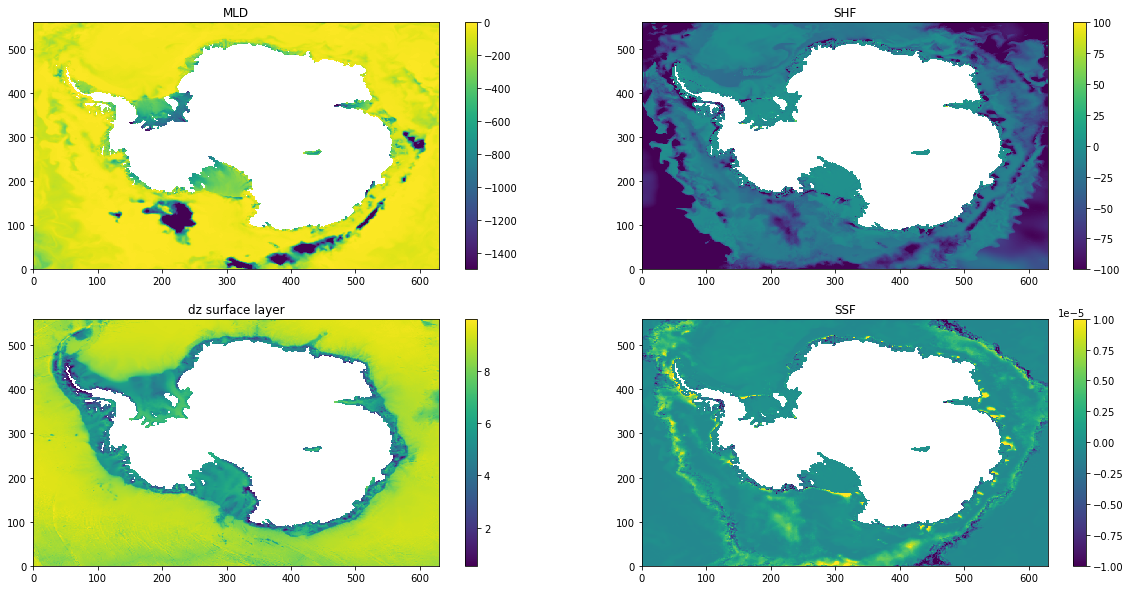

In [6]:
### print(sfc_mld.shape)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)#, projection=proj)
cy=plt.pcolor(sfc_mld[6,:,:])#, transform=ccrs.PlateCarree())
plt.colorbar(cy)
plt.clim(-1500.,0.)
plt.title('MLD')
ax2 = fig.add_subplot(222)
cy=plt.pcolor(shflux[6,:,:])
plt.colorbar(cy)
plt.clim(-100.,100.)
plt.title('SHF')
ax3 = fig.add_subplot(224)
cy=plt.pcolor(ssflux[6,:,:])
plt.colorbar(cy)
plt.clim(-0.00001,0.00001)
plt.title('SSF')
ax4 = fig.add_subplot(223)
cy=plt.pcolor(dz[6,:,:,-1])
plt.colorbar(cy)
#plt.clim(-0.00001,0.00001)
plt.title('dz surface layer')



In [95]:
# calculate the LHS term in Pellichero et al (2018):
# ps: Diffusion (R_s, R_t) terms already include the sfc fluxes

# heat (eqn 5)
rho0 = 1025 #1000
Cp = 3985

# same but using diff_vint:
# salt (eqn 4)
R_s_vint = salt_hdia_diff_mld_vint*mask_zice + salt_vdia_diff_mld_vint*mask_zice

# heat (eqn 5)
R_t_vint = temp_hdia_diff_mld_vint*mask_zice + temp_vdia_diff_mld_vint*mask_zice

# calculate individual terms and RHS:
salt_sfc = ssflux*mask_zice

temp_sfc = np.divide(shflux, rho0*Cp)*mask_zice #*dz[:,:,:,-1]) 
# divide by surface thickness make it too small compared with other terms
# if not divide, it's a too large

# ML budget equation: 
# salt:
# salt_sfc - R_s = -salt_tend_mld + salt_hdia_adv_mld + salt_vdia_adv_mld

# temp:
# temp_sfc - R_t = -temp_tend_mld + temp_hdia_adv_mld + temp_vdia_adv_mld

salt_adv_mld_vint = salt_hdia_adv_mld_vint*mask_zice + salt_vdia_adv_mld_vint*mask_zice
temp_adv_mld_vint = temp_hdia_adv_mld_vint*mask_zice + temp_vdia_adv_mld_vint*mask_zice

RHS_salt_vint = -salt_tend_mld_vint + salt_hdia_adv_mld_vint + salt_vdia_adv_mld_vint
RHS_heat_vint = -temp_tend_mld_vint + temp_hdia_adv_mld_vint + temp_vdia_adv_mld_vint


In [120]:
# convert salt convergenvces to equivalent FW
fwf_sfc = np.divide(ssflux, -0.001*salt[:,-1,:,:])*mask_zice

## salt_flux(m/s) = fwf(kg/m^2/s) * -salt(psu)/rho_fw (1000 kg.m-3)
## fwf(cm/s) = fwf(kg/m^2/s) * 0.1
## fwf(m/s) = fwf(cm/s)/100

fwf_hdia_adv_mld_vint = np.divide(salt_hdia_adv_mld_vint, -0.001*salt_avg_mld[:,:,:])*mask_zice
fwf_vdia_adv_mld_vint = np.divide(salt_vdia_adv_mld_vint, -0.001*salt_avg_mld[:,:,:])*mask_zice
fwf_hdia_diff_mld_vint = np.divide(salt_hdia_diff_mld_vint, -0.001*salt_avg_mld[:,:,:])*mask_zice
fwf_vdia_diff_mld_vint = np.divide(salt_vdia_diff_mld_vint, -0.001*salt_avg_mld[:,:,:])*mask_zice
fwf_tend_mld_vint = np.divide(salt_tend_mld_vint, -0.001*salt_avg_mld[:,:,:])*mask_zice

fwf_adv_mld_vint = fwf_hdia_adv_mld_vint + fwf_vdia_adv_mld_vint
R_f_vint = fwf_hdia_diff_mld_vint + fwf_vdia_diff_mld_vint


In [49]:
fig_path = '/users/boeiradi/COLD_project/postprocessing/figs/WMT/'

print(salt_sfc.shape, fwf_sfc.shape, mm)

print(mm,dz.shape)
mm=7

(12, 560, 630) (12, 560, 630) 11
11 (12, 560, 630, 31)


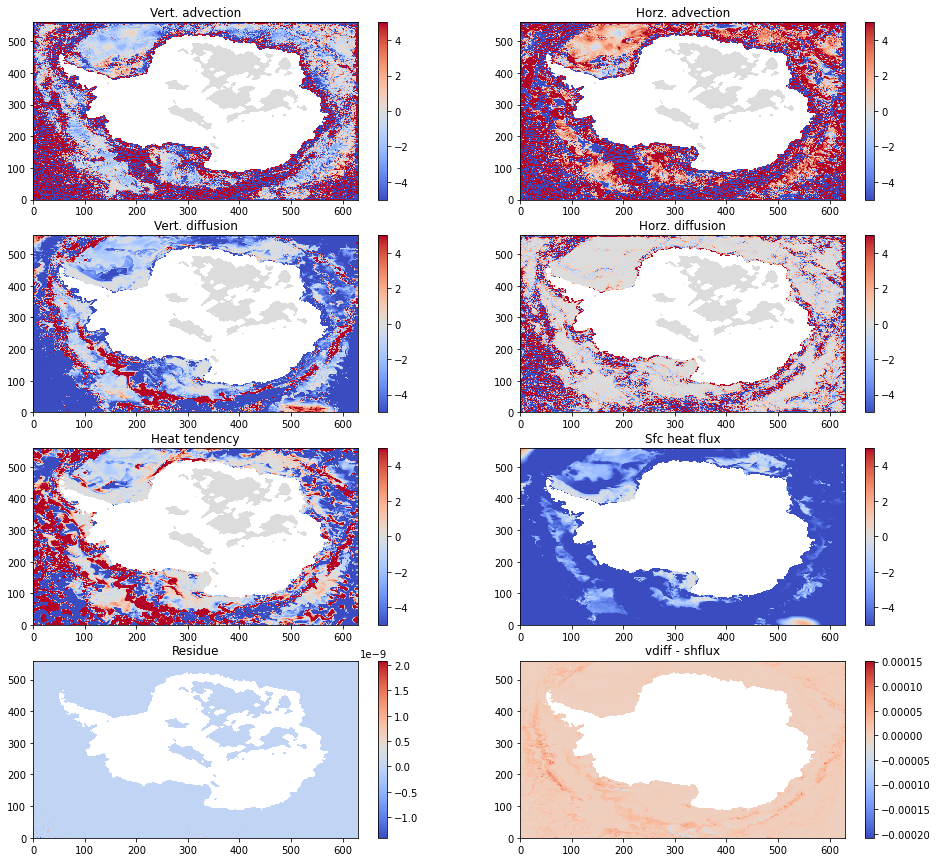

In [101]:
mm=7

fig = plt.figure(figsize=(16,15))
ax1 = fig.add_subplot(421)
plt.title('Vert. advection')
cy=plt.pcolor(temp_vdia_adv_mld_vint[mm,:,:]*mask_zice*1e6, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-5,5.)
ax2 = fig.add_subplot(422)
plt.title('Horz. advection')
cy=plt.pcolor(temp_hdia_adv_mld_vint[mm,:,:]*mask_zice*1e6, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-5,5.)
ax3 = fig.add_subplot(423)
plt.title('Vert. diffusion')
cy=plt.pcolor(temp_vdia_diff_mld_vint[mm,:,:]*mask_zice*1e6, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-5,5.)
ax4 = fig.add_subplot(424)
plt.title('Horz. diffusion')
cy=plt.pcolor(temp_hdia_diff_mld_vint[mm,:,:]*mask_zice*1e6, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-5,5.)
ax5 = fig.add_subplot(425)
plt.title('Heat tendency')
cy=plt.pcolor(temp_tend_mld_vint[mm,:,:]*mask_zice*1e6, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-5,5.)
ax6 = fig.add_subplot(426)
plt.title('Sfc heat flux')
cy=plt.pcolor(temp_sfc[mm,:,:]*mask_zice*1e6, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-5,5.)
# residue
res = temp_tend_mld_vint[mm,:,:] - (temp_vdia_adv_mld_vint[mm,:,:]+temp_hdia_adv_mld_vint[mm,:,:]+temp_vdia_diff_mld_vint[mm,:,:]+temp_hdia_diff_mld_vint[mm,:,:])
ax7 = fig.add_subplot(427)
plt.title('Residue')
cy=plt.pcolor(res*mask_zice, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
#plt.clim(0,1.)
ax8 = fig.add_subplot(428)
plt.title('vdiff - shflux')
cy=plt.pcolor(temp_vdia_diff_mld_vint[mm,:,:]*mask_zice - temp_sfc[mm,:,:]*mask_zice, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
#plt.clim(-.00001,.00001)
name_fig="waom10extend_shflim_S_0.25Q_WMT_heat_budget_mm=7_yr21.png"
plt.savefig(fig_path + name_fig, dpi=300)

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


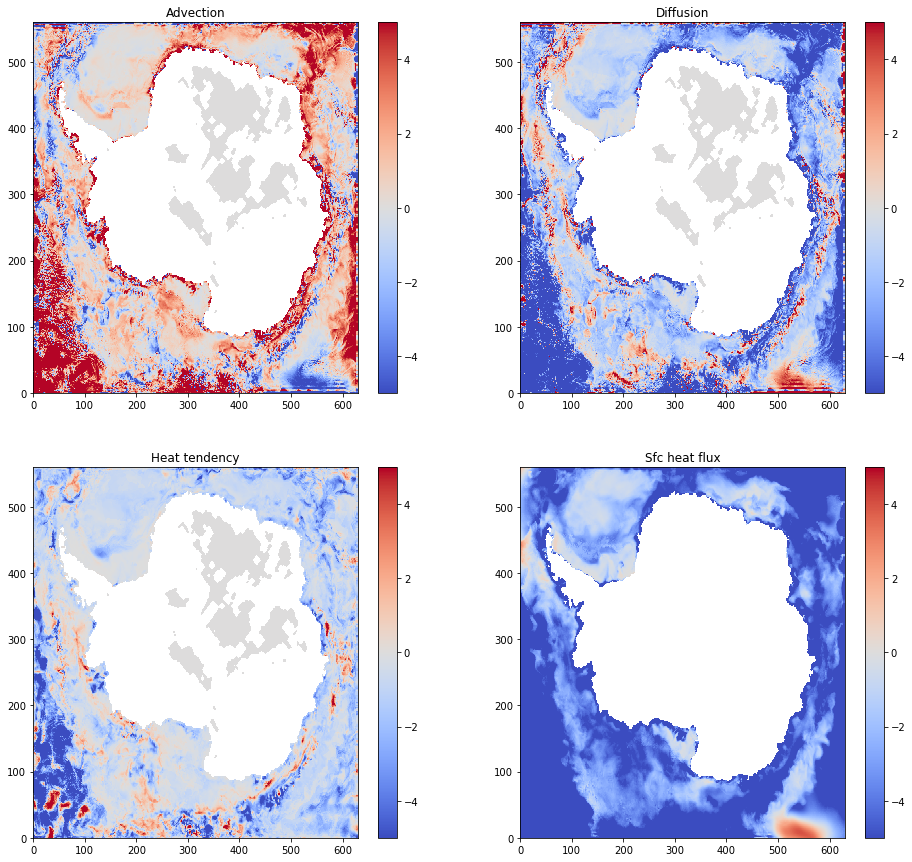

In [102]:

fig = plt.figure(figsize=(16,15))
ax1 = fig.add_subplot(221)
plt.title('Advection')
cy=plt.pcolor(np.nanmean(temp_vdia_adv_mld_vint[:,:,:],axis=0)*mask_zice*1e6 +np.nanmean(temp_hdia_adv_mld_vint[:,:,:],axis=0)*mask_zice*1e6, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-5,5.)
ax2 = fig.add_subplot(222)
plt.title('Diffusion')
cy=plt.pcolor(np.nanmean(temp_vdia_diff_mld_vint[:,:,:],axis=0)*mask_zice*1e6 +np.nanmean(temp_hdia_diff_mld_vint[:,:,:],axis=0)*mask_zice*1e6, cmap=plt.cm.coolwarm)
#cy=plt.pcolor(temp_vdia_diff_mld_vint[mm,:,:]*1e6, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-5,5.)
ax3 = fig.add_subplot(223)
plt.title('Heat tendency')
cy=plt.pcolor(np.nanmean(temp_tend_mld_vint[:,:,:],axis=0)*mask_zice*1e6, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-5,5.)
ax6 = fig.add_subplot(224)
plt.title('Sfc heat flux')
cy=plt.pcolor(np.nanmean(temp_sfc[:,:,:],axis=0)*mask_zice*1e6, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-5,5.)

name_fig="waom10extend_shflim_S_0.25Q_WMT_heat_budget_annual.png"
plt.savefig(fig_path + name_fig, dpi=300)

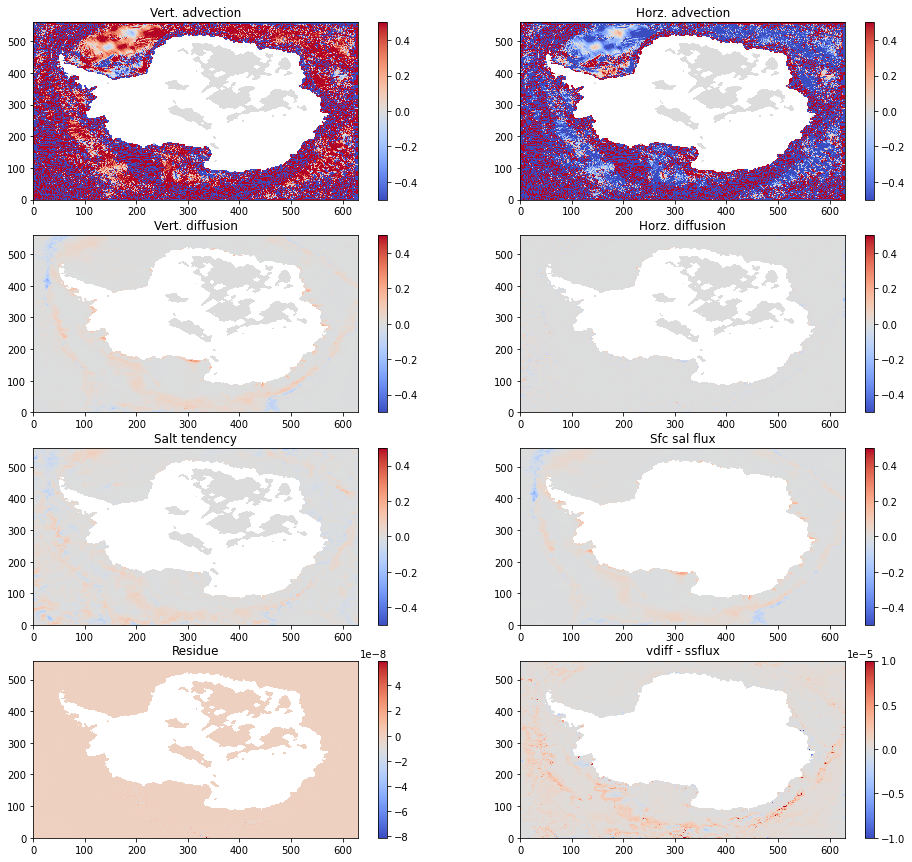

In [104]:
fig = plt.figure(figsize=(16,15))
ax1 = fig.add_subplot(421)
plt.title('Vert. advection')
cy=plt.pcolor(salt_vdia_adv_mld_vint[mm,:,:]*mask_zice*mask_zice*1e4, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.5,.5)
ax2 = fig.add_subplot(422)
plt.title('Horz. advection')
cy=plt.pcolor(salt_hdia_adv_mld_vint[mm,:,:]*mask_zice*mask_zice*1e4, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.5,.5)
ax3 = fig.add_subplot(423)
plt.title('Vert. diffusion')
cy=plt.pcolor(salt_vdia_diff_mld_vint[mm,:,:]*mask_zice*mask_zice*1e4, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.5,.5)
ax4 = fig.add_subplot(424)
plt.title('Horz. diffusion')
cy=plt.pcolor(salt_hdia_diff_mld_vint[mm,:,:]*mask_zice*mask_zice*1e4, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.5,.5)
ax5 = fig.add_subplot(425)
plt.title('Salt tendency')
cy=plt.pcolor(salt_tend_mld_vint[mm,:,:]*mask_zice*mask_zice*1e4, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.5,.5)
ax6 = fig.add_subplot(426)
plt.title('Sfc sal flux')
cy=plt.pcolor(salt_sfc[mm,:,:]*mask_zice*mask_zice*1e4, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.5,.5)
# residue
res = salt_tend_mld_vint[mm,:,:] - (salt_vdia_adv_mld_vint[mm,:,:]+salt_hdia_adv_mld_vint[mm,:,:]+salt_vdia_diff_mld_vint[mm,:,:]+salt_hdia_diff_mld_vint[mm,:,:])
ax7 = fig.add_subplot(427)
plt.title('Residue')
cy=plt.pcolor(res*mask_zice, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
#plt.clim(-.5,.5)
ax8 = fig.add_subplot(428)
plt.title('vdiff - ssflux')
cy=plt.pcolor(salt_vdia_diff_mld_vint[mm,:,:]*mask_zice - salt_sfc[mm,:,:]*mask_zice, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.00001,.00001)

name_fig="waom10extend_shflim_S_0.25Q_WMT_salt_budget_mm=7.png"
plt.savefig(fig_path + name_fig, dpi=300)

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


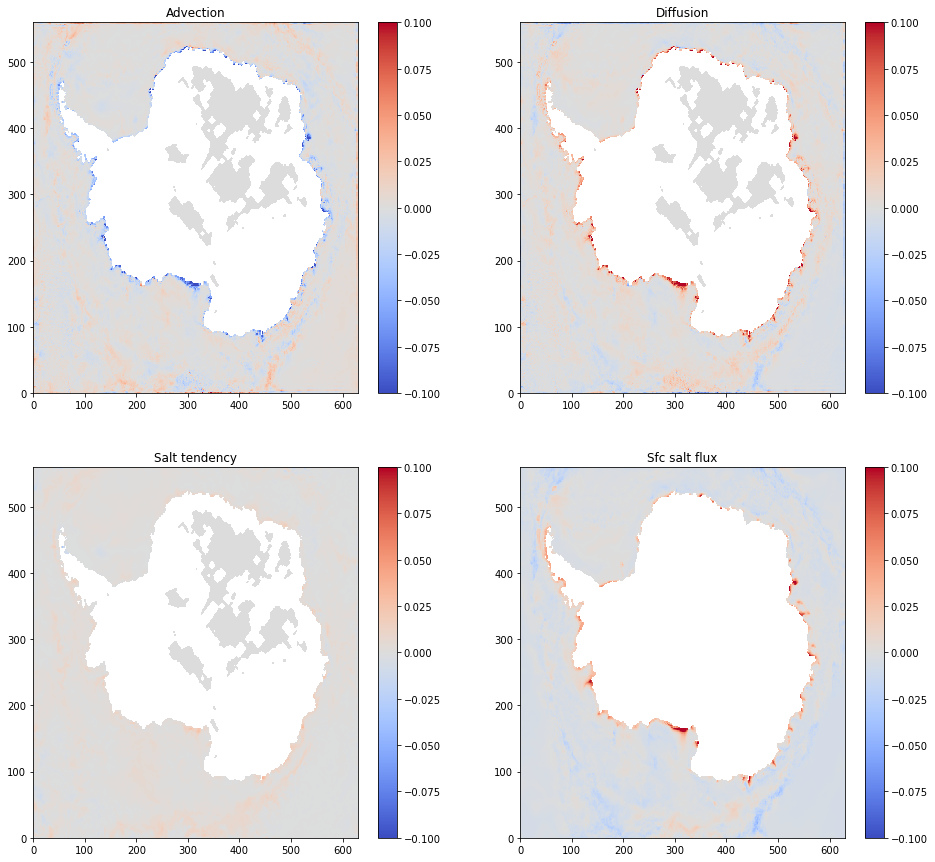

In [105]:

fig = plt.figure(figsize=(16,15))
ax1 = fig.add_subplot(221)
plt.title('Advection')
cy=plt.pcolor(np.nanmean(salt_vdia_adv_mld_vint[:,:,:],axis=0)*mask_zice*1e4 +np.nanmean(salt_hdia_adv_mld_vint[:,:,:],axis=0)*mask_zice*1e4, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.1,.1)
ax2 = fig.add_subplot(222)
plt.title('Diffusion')
cy=plt.pcolor(np.nanmean(salt_vdia_diff_mld_vint[:,:,:],axis=0)*mask_zice*1e4 +np.nanmean(salt_hdia_diff_mld_vint[:,:,:],axis=0)*mask_zice*1e4, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.1,.1)
ax3 = fig.add_subplot(223)
plt.title('Salt tendency')
cy=plt.pcolor(np.nanmean(salt_tend_mld_vint[:,:,:],axis=0)*mask_zice*1e4, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.1,.1)
ax7 = fig.add_subplot(224)
plt.title('Sfc salt flux')
cy=plt.pcolor(np.nanmean(salt_sfc[:,:,:],axis=0)*mask_zice*1e4, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.1,.1)
name_fig="waom10extend_shflim_S_0.25Q_WMT_salt_budget_annual.png"
plt.savefig(fig_path + name_fig, dpi=300)

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


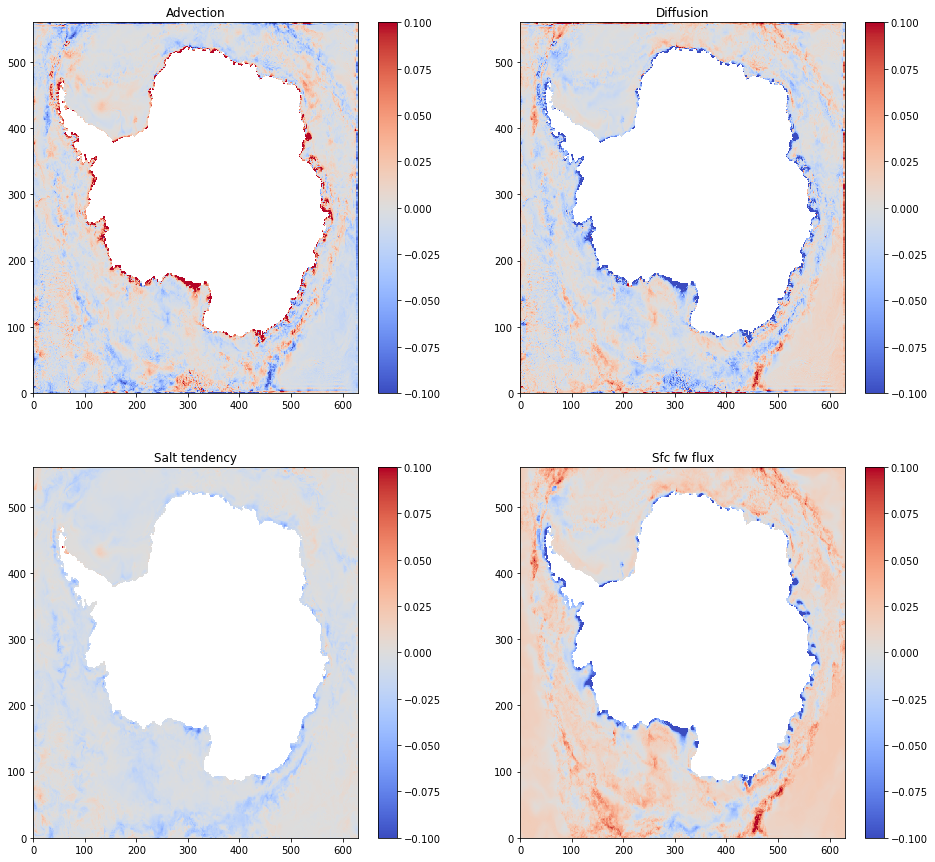

In [122]:
# same for salt but using fwf
fig = plt.figure(figsize=(16,15))
ax1 = fig.add_subplot(221)
plt.title('Advection')
cy=plt.pcolor(np.nanmean(fwf_vdia_adv_mld_vint[:,:,:],axis=0)*1e3 +np.nanmean(fwf_hdia_adv_mld_vint[:,:,:],axis=0)*1e3, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.1,.1)
ax2 = fig.add_subplot(222)
plt.title('Diffusion')
cy=plt.pcolor(np.nanmean(fwf_vdia_diff_mld_vint[:,:,:],axis=0)*1e3 +np.nanmean(fwf_hdia_diff_mld_vint[:,:,:],axis=0)*1e3, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.1,.1)
ax3 = fig.add_subplot(223)
plt.title('Salt tendency')
cy=plt.pcolor(np.nanmean(fwf_tend_mld_vint[:,:,:],axis=0)*1e3, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.1,.1)
ax6 = fig.add_subplot(224)
plt.title('Sfc fw flux')
cy=plt.pcolor(np.nanmean(fwf_sfc[:,:,:],axis=0)*1e3, cmap=plt.cm.coolwarm)
plt.colorbar(cy)
plt.clim(-.1,.1)
name_fig="waom10extend_shflim_S_0.25Q_WMT_fwf_budget_annual.png"
plt.savefig(fig_path + name_fig, dpi=300)

In [123]:
# calculate Annual-mean transformation rate (F, expressed in m3.s-1)

# rho grid for binning:
#rho_grid=np.arange(35.5,37.4,0.1) # for sigma-2
rho_grid=np.arange(24.4,29.1,0.1) # for sigma-0
len_rho_grid=len(rho_grid)

dx = np.divide(1,pm)
dy = np.divide(1,pn)
dt = 86400#30#/12 #why divide by 12?

# rho grid for binning:
Fs_rate_adv_vint = np.empty(RHS_salt_vint.shape)
Ff_rate_adv_vint = np.empty(RHS_salt_vint.shape)
Fh_rate_adv_vint = np.empty(RHS_heat_vint.shape)
Fs_rate_diff_vint = np.empty(RHS_salt_vint.shape)
Ff_rate_diff_vint = np.empty(RHS_salt_vint.shape)
Fh_rate_diff_vint = np.empty(RHS_heat_vint.shape)
Fs_rate_net_vint = np.empty(RHS_salt_vint.shape)
Ff_rate_net_vint = np.empty(RHS_salt_vint.shape)
Fh_rate_net_vint = np.empty(RHS_heat_vint.shape)
Fs_rate_sfc = np.empty(RHS_salt_vint.shape)
Ff_rate_sfc = np.empty(RHS_salt_vint.shape)
Fh_rate_sfc = np.empty(RHS_heat_vint.shape)

for mm in np.arange(0,12):
    Fs_rate_adv_vint[mm,:] = dt*dx*dy*(1/9.81)*salt_adv_mld_vint.isel(times=mm)
    Ff_rate_adv_vint[mm,:] = dt*dx*dy*(1/9.81)*fwf_adv_mld_vint.isel(times=mm)
    Fh_rate_adv_vint[mm,:] = dt*dx*dy*(1/9.81)*temp_adv_mld_vint.isel(times=mm)
    
    Fs_rate_diff_vint[mm,:] = dt*dx*dy*(1/9.81)*R_s_vint.isel(times=mm)
    Ff_rate_diff_vint[mm,:] = dt*dx*dy*(1/9.81)*R_f_vint.isel(times=mm)
    Fh_rate_diff_vint[mm,:] = dt*dx*dy*(1/9.81)*R_t_vint.isel(times=mm)
    
    Fs_rate_net_vint[mm,:] = dt*dx*dy*(1/9.81)*salt_tend_mld_vint.isel(times=mm)
    Ff_rate_net_vint[mm,:] = dt*dx*dy*(1/9.81)*fwf_tend_mld_vint.isel(times=mm)
    Fh_rate_net_vint[mm,:] = dt*dx*dy*(1/9.81)*temp_tend_mld_vint.isel(times=mm)
    
    Fs_rate_sfc[mm,:] = dt*dx*dy*(1/9.81)*salt_sfc[mm,:,:]#.isel(times=mm)
    Ff_rate_sfc[mm,:] = dt*dx*dy*(1/9.81)*fwf_sfc[mm,:,:]#.isel(times=mm)
    Fh_rate_sfc[mm,:] = dt*dx*dy*(1/9.81)*temp_sfc[mm,:,:]#.isel(times=mm)
    
print(Fs_rate_net_vint.shape)



(12, 560, 630)


In [124]:
#  mask for density classes: total advection (vint)
Fs_rate_delta_adv_vint_mm = np.empty((12,len_rho_grid,560,630))
Ff_rate_delta_adv_vint_mm = np.empty((12,len_rho_grid,560,630))
Fh_rate_delta_adv_vint_mm = np.empty((12,len_rho_grid,560,630))

for mm in np.arange(0,12):
    sigma_tmp = sigma_t[mm,:,:]
    
    print(mm)
    for irho in np.arange(0,len_rho_grid):
    
        #print(irho)
    
        Fs_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fs_rate_adv_vint[mm,:,:])
        Ff_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Ff_rate_adv_vint[mm,:,:])
        Fh_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fh_rate_adv_vint[mm,:,:])

        if irho == 0:
            Fs_rate_delta = Fs_rate_tmp.copy()
            Fs_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Ff_rate_delta = Ff_rate_tmp.copy()
            Ff_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = Fh_rate_tmp.copy()
            Fh_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
        elif irho == 1:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_delta = np.stack((Fs_rate_delta,Fs_rate_tmp), axis=0)
            Ff_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Ff_rate_delta = np.stack((Ff_rate_delta,Ff_rate_tmp), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = np.stack((Fh_rate_delta,Fh_rate_tmp), axis=0)
        else:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_extradim = np.expand_dims(Fs_rate_tmp, axis=0)
            Fs_rate_delta = np.concatenate((Fs_rate_delta,Fs_rate_extradim), axis=0)
            Ff_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Ff_rate_extradim = np.expand_dims(Ff_rate_tmp, axis=0)
            Ff_rate_delta = np.concatenate((Ff_rate_delta,Ff_rate_extradim), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_extradim = np.expand_dims(Fh_rate_tmp, axis=0)
            Fh_rate_delta = np.concatenate((Fh_rate_delta,Fh_rate_extradim), axis=0)
        del Fs_rate_tmp, Ff_rate_tmp, Fh_rate_tmp
        
    Fs_rate_delta_adv_vint_mm[mm,:] = Fs_rate_delta
    Ff_rate_delta_adv_vint_mm[mm,:] = Ff_rate_delta
    Fh_rate_delta_adv_vint_mm[mm,:] = Fh_rate_delta

    
print(Fs_rate_delta_adv_vint_mm.shape, Fh_rate_delta_adv_vint_mm.shape)

0
1
2
3
4
5
6
7
8
9
10
11
(12, 48, 560, 630) (12, 48, 560, 630)


In [125]:
#  mask for density classes: total diffusion (vint)
Fs_rate_delta_diff_vint_mm = np.empty((12,len_rho_grid,560,630))
Ff_rate_delta_diff_vint_mm = np.empty((12,len_rho_grid,560,630))
Fh_rate_delta_diff_vint_mm = np.empty((12,len_rho_grid,560,630))

for mm in np.arange(0,12):
    sigma_tmp = sigma_t[mm,:,:]
    
    print(mm)
    for irho in np.arange(0,len_rho_grid):
    
        #print(irho)
    
        Fs_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fs_rate_diff_vint[mm,:,:])
        Ff_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Ff_rate_diff_vint[mm,:,:])
        Fh_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fh_rate_diff_vint[mm,:,:])

        if irho == 0:
            Fs_rate_delta = Fs_rate_tmp.copy()
            Fs_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Ff_rate_delta = Ff_rate_tmp.copy()
            Ff_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = Fh_rate_tmp.copy()
            Fh_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
        elif irho == 1:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_delta = np.stack((Fs_rate_delta,Fs_rate_tmp), axis=0)
            Ff_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Ff_rate_delta = np.stack((Ff_rate_delta,Ff_rate_tmp), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = np.stack((Fh_rate_delta,Fh_rate_tmp), axis=0)
        else:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_extradim = np.expand_dims(Fs_rate_tmp, axis=0)
            Fs_rate_delta = np.concatenate((Fs_rate_delta,Fs_rate_extradim), axis=0)
            Ff_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Ff_rate_extradim = np.expand_dims(Ff_rate_tmp, axis=0)
            Ff_rate_delta = np.concatenate((Ff_rate_delta,Ff_rate_extradim), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_extradim = np.expand_dims(Fh_rate_tmp, axis=0)
            Fh_rate_delta = np.concatenate((Fh_rate_delta,Fh_rate_extradim), axis=0)
        del Fs_rate_tmp, Ff_rate_tmp, Fh_rate_tmp
        
    Fs_rate_delta_diff_vint_mm[mm,:] = Fs_rate_delta
    Ff_rate_delta_diff_vint_mm[mm,:] = Ff_rate_delta
    Fh_rate_delta_diff_vint_mm[mm,:] = Fh_rate_delta

    
print(Fs_rate_delta_diff_vint_mm.shape, Fh_rate_delta_diff_vint_mm.shape)

0
1
2
3
4
5
6
7
8
9
10
11
(12, 48, 560, 630) (12, 48, 560, 630)


In [126]:
#  mask for density classes: net tendency (vint)
Fs_rate_delta_net_vint_mm = np.empty((12,len_rho_grid,560,630))
Ff_rate_delta_net_vint_mm = np.empty((12,len_rho_grid,560,630))
Fh_rate_delta_net_vint_mm = np.empty((12,len_rho_grid,560,630))

for mm in np.arange(0,12):
    sigma_tmp = sigma_t[mm,:,:]
    
    print(mm)
    for irho in np.arange(0,len_rho_grid):
    
        #print(irho)
    
        Fs_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fs_rate_net_vint[mm,:,:])
        Ff_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Ff_rate_net_vint[mm,:,:])
        Fh_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fh_rate_net_vint[mm,:,:])

        if irho == 0:
            Fs_rate_delta = Fs_rate_tmp.copy()
            Fs_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Ff_rate_delta = Ff_rate_tmp.copy()
            Ff_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan            
            Fh_rate_delta = Fh_rate_tmp.copy()
            Fh_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
        elif irho == 1:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_delta = np.stack((Fs_rate_delta,Fs_rate_tmp), axis=0)
            Ff_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Ff_rate_delta = np.stack((Ff_rate_delta,Ff_rate_tmp), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = np.stack((Fh_rate_delta,Fh_rate_tmp), axis=0)
        else:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_extradim = np.expand_dims(Fs_rate_tmp, axis=0)
            Fs_rate_delta = np.concatenate((Fs_rate_delta,Fs_rate_extradim), axis=0)
            Ff_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Ff_rate_extradim = np.expand_dims(Ff_rate_tmp, axis=0)
            Ff_rate_delta = np.concatenate((Ff_rate_delta,Ff_rate_extradim), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_extradim = np.expand_dims(Fh_rate_tmp, axis=0)
            Fh_rate_delta = np.concatenate((Fh_rate_delta,Fh_rate_extradim), axis=0)
        del Fs_rate_tmp, Ff_rate_tmp, Fh_rate_tmp
        
    Fs_rate_delta_net_vint_mm[mm,:] = Fs_rate_delta
    Ff_rate_delta_net_vint_mm[mm,:] = Ff_rate_delta
    Fh_rate_delta_net_vint_mm[mm,:] = Fh_rate_delta

    
print(Fs_rate_delta_net_vint_mm.shape, Fh_rate_delta_net_vint_mm.shape)

0
1
2
3
4
5
6
7
8
9
10
11
(12, 48, 560, 630) (12, 48, 560, 630)


In [127]:
#  mask for density classes: surface fluxes
Fs_rate_delta_sfc_mm = np.empty((12,len_rho_grid,560,630))
Ff_rate_delta_sfc_mm = np.empty((12,len_rho_grid,560,630))
Fh_rate_delta_sfc_mm = np.empty((12,len_rho_grid,560,630))

for mm in np.arange(0,12):
    sigma_tmp = sigma_t_sfc[mm,:,:]
    
    print(mm)
    for irho in np.arange(0,len_rho_grid):
    
        #print(irho)
    
        Fs_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fs_rate_sfc[mm,:,:])
        Ff_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Ff_rate_sfc[mm,:,:])
        Fh_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fh_rate_sfc[mm,:,:])

        if irho == 0:
            Fs_rate_delta = Fs_rate_tmp.copy()
            Fs_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Ff_rate_delta = Ff_rate_tmp.copy()
            Ff_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = Fh_rate_tmp.copy()
            Fh_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
        elif irho == 1:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_delta = np.stack((Fs_rate_delta,Fs_rate_tmp), axis=0)
            Ff_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Ff_rate_delta = np.stack((Ff_rate_delta,Ff_rate_tmp), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = np.stack((Fh_rate_delta,Fh_rate_tmp), axis=0)
        else:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_extradim = np.expand_dims(Fs_rate_tmp, axis=0)
            Fs_rate_delta = np.concatenate((Fs_rate_delta,Fs_rate_extradim), axis=0)
            Ff_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Ff_rate_extradim = np.expand_dims(Ff_rate_tmp, axis=0)
            Ff_rate_delta = np.concatenate((Ff_rate_delta,Ff_rate_extradim), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_extradim = np.expand_dims(Fh_rate_tmp, axis=0)
            Fh_rate_delta = np.concatenate((Fh_rate_delta,Fh_rate_extradim), axis=0)
        del Fs_rate_tmp, Fh_rate_tmp, Ff_rate_tmp
        
    Fs_rate_delta_sfc_mm[mm,:] = Fs_rate_delta
    Ff_rate_delta_sfc_mm[mm,:] = Ff_rate_delta
    Fh_rate_delta_sfc_mm[mm,:] = Fh_rate_delta

    
print(Fs_rate_delta_sfc_mm.shape, Fh_rate_delta_sfc_mm.shape, Ff_rate_delta_sfc_mm.shape)

0
1
2
3
4
5
6
7
8
9
10
11
(12, 48, 560, 630) (12, 48, 560, 630) (12, 48, 560, 630)


0 24.349999999999998 24.45 (50, 50)
1 24.45 24.55 (50, 50)
2 24.55 24.650000000000002 (50, 50)
3 24.650000000000002 24.750000000000004 (50, 50)
4 24.750000000000004 24.850000000000005 (50, 50)
5 24.850000000000005 24.950000000000006 (50, 50)
6 24.950000000000006 25.050000000000008 (50, 50)
7 25.050000000000008 25.15000000000001 (50, 50)
8 25.15000000000001 25.25000000000001 (50, 50)
9 25.25000000000001 25.350000000000012 (50, 50)
10 25.350000000000012 25.450000000000014 (50, 50)
11 25.450000000000014 25.550000000000015 (50, 50)
12 25.550000000000015 25.650000000000016 (50, 50)
13 25.650000000000016 25.750000000000018 (50, 50)
14 25.750000000000018 25.85000000000002 (50, 50)
15 25.85000000000002 25.95000000000002 (50, 50)
16 25.95000000000002 26.050000000000022 (50, 50)
17 26.050000000000022 26.150000000000023 (50, 50)
18 26.150000000000023 26.250000000000025 (50, 50)
19 26.250000000000025 26.350000000000026 (50, 50)
20 26.350000000000026 26.450000000000028 (50, 50)
21 26.45000000000002

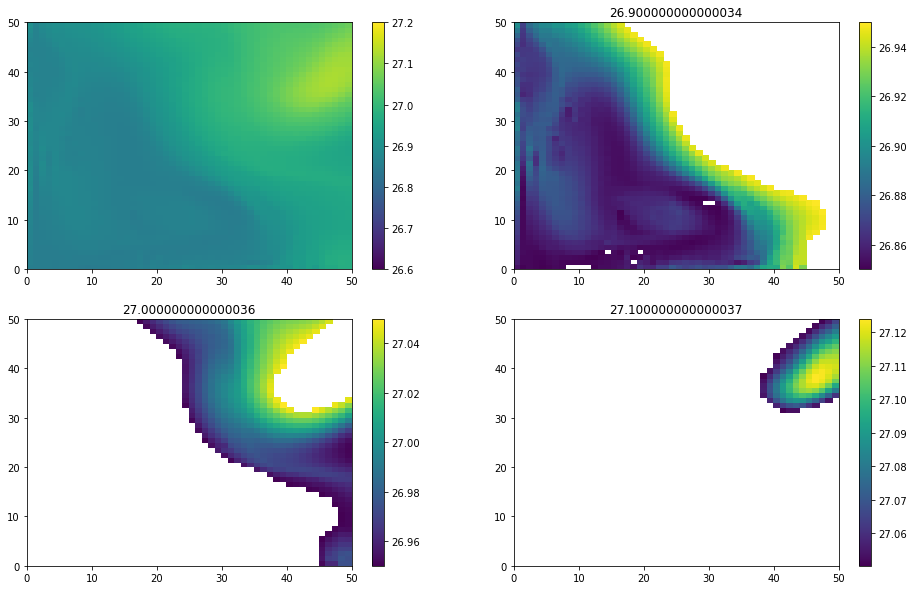

In [113]:
# development mask for density classes:
sigma_sept = sigma_t[8,0:50,0:50]

for irho in np.arange(0,len_rho_grid):
    print(irho, rho_grid[irho]-(0.1/2), rho_grid[irho]+(0.1/2), sigma_sept.shape)
    #print(irho, rho_grid[irho])
    
#    icritst_tmp = ma.masked_where(sigma_sept >= rho_grid[irho], sigma_sept)
    icritst_tmp = ma.masked_where(np.logical_or(sigma_sept <= (rho_grid[irho]-(0.1/2)),sigma_sept > (rho_grid[irho]+(0.1/2))), sigma_sept)

    #print(icritst_tmp.shape)
    
    
    if irho == 0:
        icritst = icritst_tmp.copy()
        #icritst[sigma_sept >= rho_grid[irho]] = np.nan
        icritst[np.logical_or(sigma_sept <= (rho_grid[irho]-(0.1/2)),sigma_sept > (rho_grid[irho]+(0.1/2)))] = np.nan
        #print(icritst.shape)
    elif irho == 1:
        #icritst_tmp[sigma_sept >= rho_grid[irho]] = np.nan
        icritst_tmp[np.logical_or(sigma_sept <= (rho_grid[irho]-(0.1/2)),sigma_sept > (rho_grid[irho]+(0.1/2)))] = np.nan
        icritst = np.stack((icritst,icritst_tmp), axis=0)
        #print(icritst.shape)
    else:
        icritst_tmp[np.logical_or(sigma_sept <= (rho_grid[irho]-(0.1/2)),sigma_sept > (rho_grid[irho]+(0.1/2)))] = np.nan
        icritst_extradim = np.expand_dims(icritst_tmp, axis=0)
        icritst = np.concatenate((icritst,icritst_extradim), axis=0)
        #print(icritst.shape)
    del icritst_tmp
    
print(icritst.shape)
    
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(221)
plt.title('')
cy=plt.pcolor(sigma_sept)
plt.colorbar(cy)
plt.clim(26.6,27.2)
ax2 = fig.add_subplot(222)
plt.title(str(rho_grid[25]))
cy=plt.pcolor(icritst[25,:,:])
plt.colorbar(cy)
#plt.clim(26.6,26.9)
ax3 = fig.add_subplot(223)
plt.title(str(rho_grid[26]))
cy=plt.pcolor(icritst[26,:,:])
plt.colorbar(cy)
#plt.clim(26.6,26.9)
ax3 = fig.add_subplot(224)
plt.title(str(rho_grid[27]))
cy=plt.pcolor(icritst[27,:,:])
plt.colorbar(cy)
#plt.clim(26.6,26.9)


In [128]:
# integrated over x, y directions:
Fs_rate_sfc_mm_int = np.empty((len(rho_grid),12))
Ff_rate_sfc_mm_int = np.empty((len(rho_grid),12))
Fh_rate_sfc_mm_int = np.empty((len(rho_grid),12))

Fs_rate_adv_vint_mm_int = np.empty((len(rho_grid),12))
Ff_rate_adv_vint_mm_int = np.empty((len(rho_grid),12))
Fh_rate_adv_vint_mm_int = np.empty((len(rho_grid),12))
Fs_rate_diff_vint_mm_int = np.empty((len(rho_grid),12))
Ff_rate_diff_vint_mm_int = np.empty((len(rho_grid),12))
Fh_rate_diff_vint_mm_int = np.empty((len(rho_grid),12))
Fs_rate_net_vint_mm_int = np.empty((len(rho_grid),12))
Ff_rate_net_vint_mm_int = np.empty((len(rho_grid),12))
Fh_rate_net_vint_mm_int = np.empty((len(rho_grid),12))


for irho in np.arange(0,len(rho_grid)):   
    for mm in np.arange(0,12):
        
        Fs_rate_sfc_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_sfc_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        Ff_rate_sfc_mm_int[irho,mm] = np.nansum(np.nansum(Ff_rate_delta_sfc_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        Fh_rate_sfc_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_sfc_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        
        Fs_rate_adv_vint_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_adv_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        Ff_rate_adv_vint_mm_int[irho,mm] = np.nansum(np.nansum(Ff_rate_delta_adv_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        Fh_rate_adv_vint_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_adv_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        
        Fs_rate_diff_vint_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_diff_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        Ff_rate_diff_vint_mm_int[irho,mm] = np.nansum(np.nansum(Ff_rate_delta_diff_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        Fh_rate_diff_vint_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_diff_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        
        Fs_rate_net_vint_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_net_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        Ff_rate_net_vint_mm_int[irho,mm] = np.nansum(np.nansum(Ff_rate_delta_net_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        Fh_rate_net_vint_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_net_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1


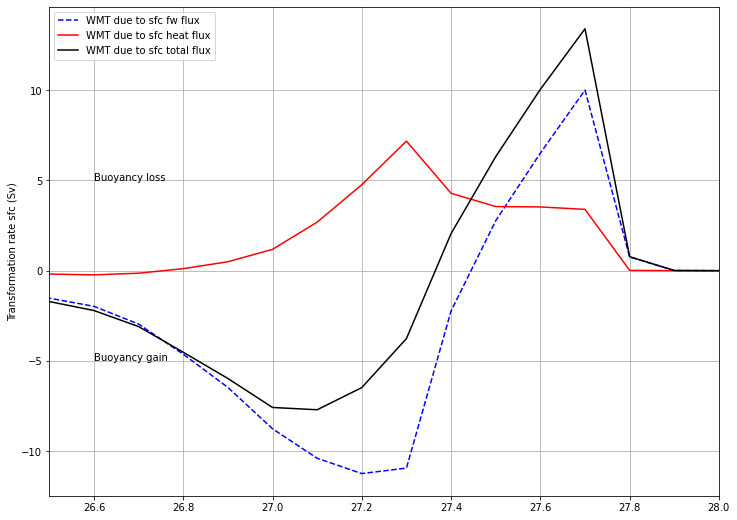

In [164]:
# figures

# plot with bars
width=.023

# convert to rate per year:
Dt = 86400*365#*10

# divide for Dt (sec in 1 year) and 10^6 to obtain rate in Sv year-1 

# SFC
Fs_sig_sfc_mm = -Fs_rate_sfc_mm_int/Dt/1e6
Ff_sig_sfc_mm = -Ff_rate_sfc_mm_int/Dt/1e6
Fh_sig_sfc_mm = -Fh_rate_sfc_mm_int/Dt/1e6 
F_sig_sfc_mm = Ff_sig_sfc_mm + Fh_sig_sfc_mm
# - calculate the anual average of the monthly ars:
Fs_sig_sfc =  np.nanmean(Fs_sig_sfc_mm, axis=1)
Ff_sig_sfc =  np.nanmean(Ff_sig_sfc_mm, axis=1)
Fh_sig_sfc =  np.nanmean(Fh_sig_sfc_mm, axis=1)
F_sig_sfc = Ff_sig_sfc + Fh_sig_sfc


fig = plt.figure(figsize=(12,9))

ax1 = fig.add_subplot(111)
plt.title('')
#cs=plt.plot(rho_grid,Fs_sig_sfc,'b',label='WMT due to sfc salt flux')
cf=plt.plot(rho_grid,Ff_sig_sfc,'--b',label='WMT due to sfc fw flux')
ch=plt.plot(rho_grid,Fh_sig_sfc,'r',label='WMT due to sfc heat flux')
ct=plt.plot(rho_grid,F_sig_sfc,'k',label='WMT due to sfc total flux')
plt.legend()
plt.ylabel('Transformation rate sfc (Sv)')
plt.xlim(26.5,28)#,plt.ylim(-100,50) # divide for dz leads to a more realistic Transf. rates
#plt.xlim(25,28),plt.ylim(-1000,500)
plt.grid(True)
plt.text(26.6,5,'Buoyancy loss')
plt.text(26.6,-5,'Buoyancy gain')

name_fig="waom10extend_shflim_S_0.25Q_WMT_sfc_fluxes_annual_yr21.png"
plt.savefig(fig_path + name_fig, dpi=300)


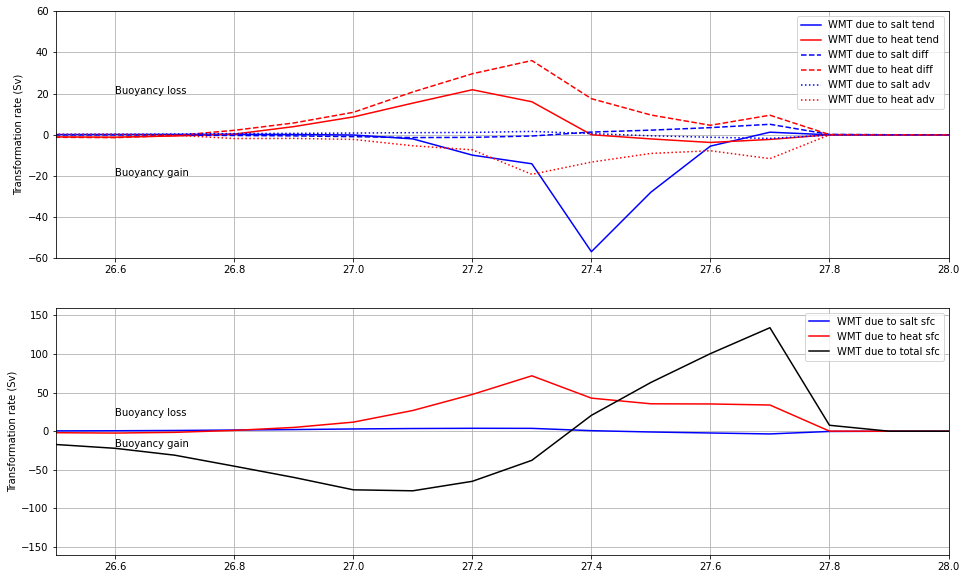

In [130]:
# ADV (vint)
Fs_sig_adv_vint_mm = -Fs_rate_adv_vint_mm_int/Dt/1e6 
Fh_sig_adv_vint_mm = -Fh_rate_adv_vint_mm_int/Dt/1e6 
F_sig_adv_vint_mm = Fs_sig_adv_vint_mm + Fh_sig_adv_vint_mm
# - calculate the anual average of the monthly ars:
Fs_sig_adv_vint =  np.nanmean(Fs_sig_adv_vint_mm, axis=1)
Fh_sig_adv_vint =  np.nanmean(Fh_sig_adv_vint_mm, axis=1)
F_sig_adv_vint = Fs_sig_adv_vint + Fh_sig_adv_vint

# DIFF
Fs_sig_diff_vint_mm = -Fs_rate_diff_vint_mm_int/Dt/1e6 
Fh_sig_diff_vint_mm = -Fh_rate_diff_vint_mm_int/Dt/1e6 
F_sig_diff_vint_mm = Fs_sig_diff_vint_mm + Fh_sig_diff_vint_mm
# - calculate the anual average of the monthly ars:
Fs_sig_diff_vint =  np.nanmean(Fs_sig_diff_vint_mm, axis=1)
Fh_sig_diff_vint =  np.nanmean(Fh_sig_diff_vint_mm, axis=1)
F_sig_diff_vint = Fs_sig_diff_vint + Fh_sig_diff_vint

# NET
Fs_sig_net_vint_mm = -Fs_rate_net_vint_mm_int/Dt/1e6 
Fh_sig_net_vint_mm = -Fh_rate_net_vint_mm_int/Dt/1e6 
F_sig_net_vint_mm = -Fs_sig_net_vint_mm + Fh_sig_net_vint_mm
# - calculate the anual average of the monthly ars:
Fs_sig_net_vint =  np.nanmean(Fs_sig_net_vint_mm, axis=1)
Fh_sig_net_vint =  np.nanmean(Fh_sig_net_vint_mm, axis=1)
F_sig_net_vint = -Fs_sig_net_vint + Fh_sig_net_vint


fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
plt.title('')
cs=plt.plot(rho_grid,-Fs_sig_net_vint,'b',label='WMT due to salt tend')
ch=plt.plot(rho_grid,Fh_sig_net_vint,'r',label='WMT due to heat tend')
#ct=plt.plot(rho_grid,F_sig_net_vint,'k',label='WMT due to total tend')
cs=plt.plot(rho_grid,-Fs_sig_diff_vint,'--b',label='WMT due to salt diff')
ch=plt.plot(rho_grid,Fh_sig_diff_vint,'--r',label='WMT due to heat diff')
#ct=plt.plot(rho_grid,F_sig_diff_vint,'--k',label='WMT due to total diff')
cs=plt.plot(rho_grid,-Fs_sig_adv_vint,':b',label='WMT due to salt adv')
ch=plt.plot(rho_grid,Fh_sig_adv_vint,':r',label='WMT due to heat adv')
#ct=plt.plot(rho_grid,F_sig_adv_vint,':k',label='WMT due to total adv')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-60,60)
plt.grid(True)
plt.text(26.6,20,'Buoyancy loss')
plt.text(26.6,-20,'Buoyancy gain')
ax2 = fig.add_subplot(212)
plt.title('')
cs=plt.plot(rho_grid,Fs_sig_sfc,'b',label='WMT due to salt sfc')
ch=plt.plot(rho_grid,Fh_sig_sfc,'r',label='WMT due to heat sfc')
ct=plt.plot(rho_grid,F_sig_sfc,'k',label='WMT due to total sfc')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-160,160)
plt.grid(True)
plt.text(26.6,20,'Buoyancy loss')
plt.text(26.6,-20,'Buoyancy gain')

name_fig="waom10extend_shflim_S_0.25Q_WMT_budget_vint_annual_yr21.png"
plt.savefig(fig_path + name_fig, dpi=300)

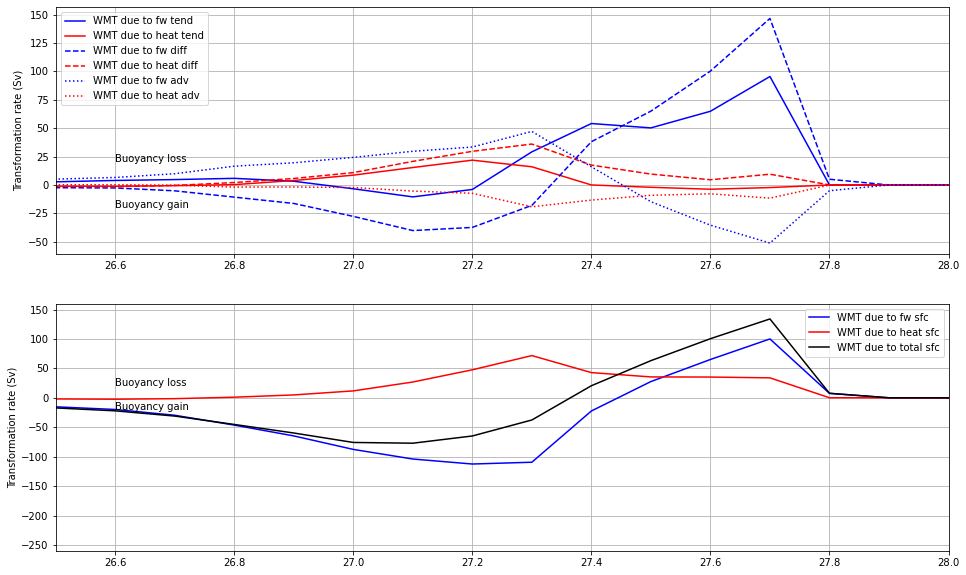

In [132]:
# ADV (vint)
Ff_sig_adv_vint_mm = -Ff_rate_adv_vint_mm_int/Dt/1e6 
Fh_sig_adv_vint_mm = -Fh_rate_adv_vint_mm_int/Dt/1e6 
F_sig_adv_vint_mm = Ff_sig_adv_vint_mm + Fh_sig_adv_vint_mm
# - calculate the anual average of the monthly ars:
Ff_sig_adv_vint =  np.nanmean(Ff_sig_adv_vint_mm, axis=1)
Fh_sig_adv_vint =  np.nanmean(Fh_sig_adv_vint_mm, axis=1)
F_sig_adv_vint = Ff_sig_adv_vint + Fh_sig_adv_vint

# DIFF
Ff_sig_diff_vint_mm = -Ff_rate_diff_vint_mm_int/Dt/1e6 
Fh_sig_diff_vint_mm = -Fh_rate_diff_vint_mm_int/Dt/1e6 
F_sig_diff_vint_mm = Ff_sig_diff_vint_mm + Fh_sig_diff_vint_mm
# - calculate the anual average of the monthly ars:
Ff_sig_diff_vint =  np.nanmean(Ff_sig_diff_vint_mm, axis=1)
Fh_sig_diff_vint =  np.nanmean(Fh_sig_diff_vint_mm, axis=1)
F_sig_diff_vint = Ff_sig_diff_vint + Fh_sig_diff_vint

# NET
Ff_sig_net_vint_mm = -Ff_rate_net_vint_mm_int/Dt/1e6 
Fh_sig_net_vint_mm = -Fh_rate_net_vint_mm_int/Dt/1e6 
F_sig_net_vint_mm = Ff_sig_net_vint_mm + Fh_sig_net_vint_mm
# - calculate the anual average of the monthly ars:
Ff_sig_net_vint =  np.nanmean(Ff_sig_net_vint_mm, axis=1)
Fh_sig_net_vint =  np.nanmean(Fh_sig_net_vint_mm, axis=1)
F_sig_net_vint = Ff_sig_net_vint + Fh_sig_net_vint

# obs (16.6.21): salt budget has opposite effect to buoyancy than fw budget,
#  so term are inverted (x-1) to plot the transformation rates. This seems to agree
#  better with the surface fluxes.
# obs (21.6.21): only inverted sign is not correct. Need to do full conversion as done from 
#  salt flux to fw flux, i.e. multiply by -1000 (fw density) and divide by salinity (avg in the MLD)

fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
plt.title('')
cs=plt.plot(rho_grid,Ff_sig_net_vint,'b',label='WMT due to fw tend')
ch=plt.plot(rho_grid,Fh_sig_net_vint,'r',label='WMT due to heat tend')
#ct=plt.plot(rho_grid,F_sig_net_vint,'k',label='WMT due to total tend')
cs=plt.plot(rho_grid,Ff_sig_diff_vint,'--b',label='WMT due to fw diff')
ch=plt.plot(rho_grid,Fh_sig_diff_vint,'--r',label='WMT due to heat diff')
#ct=plt.plot(rho_grid,F_sig_diff_vint,'--k',label='WMT due to total diff')
cs=plt.plot(rho_grid,Ff_sig_adv_vint,':b',label='WMT due to fw adv')
ch=plt.plot(rho_grid,Fh_sig_adv_vint,':r',label='WMT due to heat adv')
#ct=plt.plot(rho_grid,F_sig_adv_vint,':k',label='WMT due to total adv')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28)#,plt.ylim(-260,160)
plt.grid(True)
plt.text(26.6,20,'Buoyancy loss')
plt.text(26.6,-20,'Buoyancy gain')
ax2 = fig.add_subplot(212)
plt.title('')
cs=plt.plot(rho_grid,Ff_sig_sfc,'b',label='WMT due to fw sfc')
ch=plt.plot(rho_grid,Fh_sig_sfc,'r',label='WMT due to heat sfc')
ct=plt.plot(rho_grid,F_sig_sfc,'k',label='WMT due to total sfc')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-260,160)
plt.grid(True)
plt.text(26.6,20,'Buoyancy loss')
plt.text(26.6,-20,'Buoyancy gain')

name_fig="waom10extend_shflim_S_0.25Q_WMT_budget-fwf_vint_annual_yr21.png"
plt.savefig(fig_path + name_fig, dpi=300)

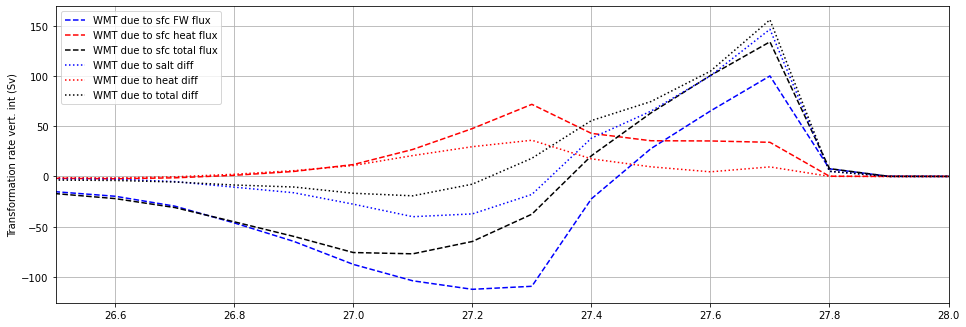

In [133]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(211)
plt.title('')
cs=plt.plot(rho_grid,Ff_sig_sfc,'--b',label='WMT due to sfc FW flux')
ch=plt.plot(rho_grid,Fh_sig_sfc,'--r',label='WMT due to sfc heat flux')
ct=plt.plot(rho_grid,F_sig_sfc,'--k',label='WMT due to sfc total flux')
#cs=plt.plot(rho_grid,Fs_sig_net_vint,'b',label='WMT due to salt tend')
#ch=plt.plot(rho_grid,Fh_sig_net_vint,'r',label='WMT due to heat tend')
#ct=plt.plot(rho_grid,F_sig_net_vint,'k',label='WMT due to total tend')
cs=plt.plot(rho_grid,Ff_sig_diff_vint,':b',label='WMT due to salt diff')
ch=plt.plot(rho_grid,Fh_sig_diff_vint,':r',label='WMT due to heat diff')
ct=plt.plot(rho_grid,F_sig_diff_vint,':k',label='WMT due to total diff')
plt.legend()
plt.ylabel('Transformation rate vert. int (Sv)')
plt.xlim(26.5,28)#,plt.ylim(-150,50)
plt.grid(True)
name_fig="waom10extend_shflim_S_0.25Q_WMT_sfcfluxVsdiffusion_annual_yr21.png"
plt.savefig(fig_path + name_fig, dpi=300)

In [136]:
# calculate Water Mass Formation
# M(sigma) = -[F(sigma_2) - F(sigma_1)]; Pellichero et al (2018) eqn 3

    
total_form_vint = np.empty(len(rho_grid))
total_form_fwf_vint = np.empty(len(rho_grid))
total_form_hf_vint = np.empty(len(rho_grid))

for irho in np.arange(0,len(rho_grid)-1):
    if irho < (len(rho_grid)-1):
        total_form_vint_tmp = -(F_sig_sfc[irho+1] - F_sig_sfc[irho])
        ##total_form_fwf_vint_tmp = (Fs_sig_sfc[irho+1] - Fs_sig_sfc[irho])
        total_form_fwf_vint_tmp = +(Ff_sig_sfc[irho+1] + Ff_sig_sfc[irho])
        total_form_hf_vint_tmp = -(Fh_sig_sfc[irho+1] - Fh_sig_sfc[irho])
    else:
        total_form_vint_tmp = -F_sig_sfc[irho]
        total_form_fwf_vint_tmp = Ff_sig_sfc[irho]
        total_form_hf_vint_tmp = -Fh_sig_sfc[irho]
        
    total_form_vint[irho] = total_form_vint_tmp
    total_form_fwf_vint[irho] = total_form_fwf_vint_tmp
    total_form_hf_vint[irho] = total_form_hf_vint_tmp

In [137]:
total_form_mm = np.empty((len(rho_grid),12))
total_form_fwf_mm = np.empty((len(rho_grid),12))
total_form_hf_mm = np.empty((len(rho_grid),12))

for irho in np.arange(0,len(rho_grid)-1):
    total_form_tmp_mm = np.empty(12)
    total_form_fwf_tmp_mm = np.empty(12)
    total_form_hf_tmp_mm = np.empty(12)
    
    for mm in np.arange(0,12):
        print(mm)
        if irho < (len(rho_grid)-1):
            total_form_tmp = -(F_sig_sfc_mm[irho+1,mm] - F_sig_sfc_mm[irho,mm])
            ##total_form_fwf_tmp = -(Fs_sig_sfc_mm[irho+1,mm] - Fs_sig_sfc_mm[irho,mm])
            total_form_fwf_tmp = (Ff_sig_sfc_mm[irho+1,mm] + Ff_sig_sfc_mm[irho,mm])
            total_form_hf_tmp = -(Fh_sig_sfc_mm[irho+1,mm] - Fh_sig_sfc_mm[irho,mm])
        else:
            total_form_tmp = -F_sig_sfc_mm[irho,mm]
            total_form_fwf_tmp = Ff_sig_sfc_mm[irho,mm]
            total_form_hf_tmp = -Fh_sig_sfc_mm[irho,mm]

        total_form_tmp_mm[mm] = total_form_tmp
        total_form_fwf_tmp_mm[mm] = total_form_fwf_tmp
        total_form_hf_tmp_mm[mm] = total_form_hf_tmp
        print(total_form_tmp_mm.shape, total_form_mm.shape)
        
    total_form_mm[irho,:] = total_form_tmp_mm
    total_form_fwf_mm[irho,:] = total_form_fwf_tmp_mm
    total_form_hf_mm[irho,:] = total_form_hf_tmp_mm

0
(12,) (48, 12)
1
(12,) (48, 12)
2
(12,) (48, 12)
3
(12,) (48, 12)
4
(12,) (48, 12)
5
(12,) (48, 12)
6
(12,) (48, 12)
7
(12,) (48, 12)
8
(12,) (48, 12)
9
(12,) (48, 12)
10
(12,) (48, 12)
11
(12,) (48, 12)
0
(12,) (48, 12)
1
(12,) (48, 12)
2
(12,) (48, 12)
3
(12,) (48, 12)
4
(12,) (48, 12)
5
(12,) (48, 12)
6
(12,) (48, 12)
7
(12,) (48, 12)
8
(12,) (48, 12)
9
(12,) (48, 12)
10
(12,) (48, 12)
11
(12,) (48, 12)
0
(12,) (48, 12)
1
(12,) (48, 12)
2
(12,) (48, 12)
3
(12,) (48, 12)
4
(12,) (48, 12)
5
(12,) (48, 12)
6
(12,) (48, 12)
7
(12,) (48, 12)
8
(12,) (48, 12)
9
(12,) (48, 12)
10
(12,) (48, 12)
11
(12,) (48, 12)
0
(12,) (48, 12)
1
(12,) (48, 12)
2
(12,) (48, 12)
3
(12,) (48, 12)
4
(12,) (48, 12)
5
(12,) (48, 12)
6
(12,) (48, 12)
7
(12,) (48, 12)
8
(12,) (48, 12)
9
(12,) (48, 12)
10
(12,) (48, 12)
11
(12,) (48, 12)
0
(12,) (48, 12)
1
(12,) (48, 12)
2
(12,) (48, 12)
3
(12,) (48, 12)
4
(12,) (48, 12)
5
(12,) (48, 12)
6
(12,) (48, 12)
7
(12,) (48, 12)
8
(12,) (48, 12)
9
(12,) (48, 12)
10
(12

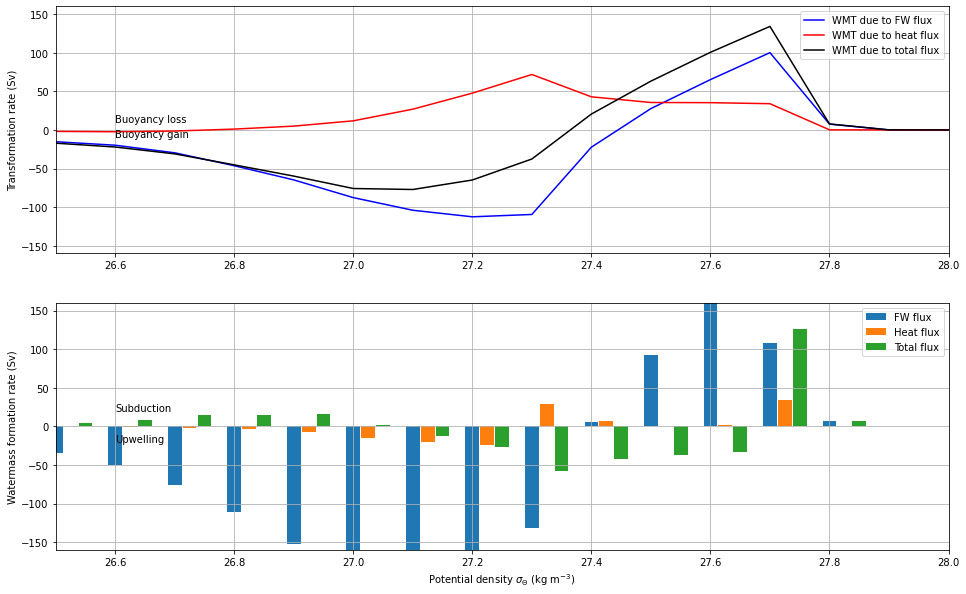

In [140]:
# same but using vert_int transformation
    
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
plt.title('')
cs=plt.plot(rho_grid,Ff_sig_sfc,'b',label='WMT due to FW flux')
ch=plt.plot(rho_grid,Fh_sig_sfc,'r',label='WMT due to heat flux')
ct=plt.plot(rho_grid,F_sig_sfc,'k',label='WMT due to total flux')
plt.legend()
#plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-160,160)
plt.grid(True)
plt.text(26.6,10,'Buoyancy loss')
plt.text(26.6,-10,'Buoyancy gain')


#fig = plt.figure(figsize=(10,7))
ax2 = fig.add_subplot(212)
plt.title('')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_vint,width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_vint,width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_vint,width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-160,160)
plt.grid(True)
plt.text(26.6,20,'Subduction')
plt.text(26.6,-20,'Upwelling')

name_fig="waom10extend_shflim_S_0.25Q_WMT_WMF_vint_annual_yr21.png"
plt.savefig(fig_path + name_fig, dpi=300)

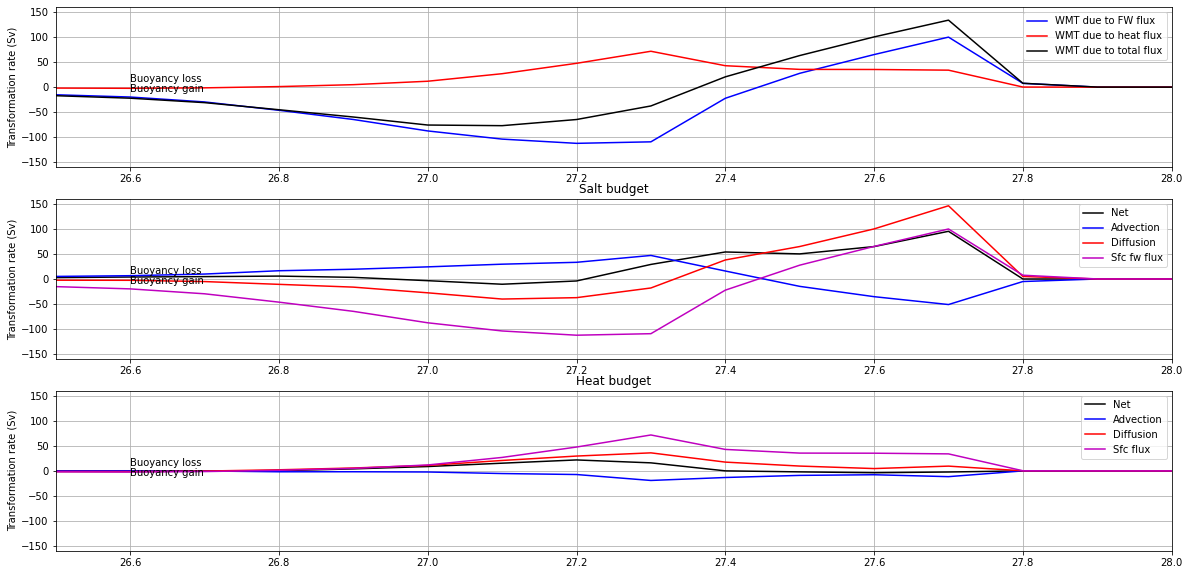

In [143]:
# figures decomposing components:
    
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(311)
plt.title('')
cs=plt.plot(rho_grid,Ff_sig_sfc,'b',label='WMT due to FW flux')
ch=plt.plot(rho_grid,Fh_sig_sfc,'r',label='WMT due to heat flux')
ct=plt.plot(rho_grid,F_sig_sfc,'k',label='WMT due to total flux')
#cs=plt.plot(rho_grid,Fs_sig_net_vint,'--b',label='WMT due to FW flux')
#ch=plt.plot(rho_grid,Fh_sig_net_vint,'--r',label='WMT due to heat flux')
#ct=plt.plot(rho_grid,F_sig_net_vint,'--k',label='WMT due to total flux')
#cs=plt.plot(rho_grid,Fs_sig_rhs_alt_vint,'-ob',label='WMT due to FW flux')
#ch=plt.plot(rho_grid,Fh_sig_rhs_alt_vint,'-or',label='WMT due to heat flux')
#ct=plt.plot(rho_grid,F_sig_rhs_alt_vint,'-ok',label='WMT due to total flux')
plt.legend()
#plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-160,160)
plt.grid(True)
plt.text(26.6,10,'Buoyancy loss')
plt.text(26.6,-10,'Buoyancy gain')



ax2 = fig.add_subplot(312)
plt.title('Salt budget')
c1=plt.plot(rho_grid, Ff_sig_net_vint,'-k',label='Net')
c2=plt.plot(rho_grid, Ff_sig_adv_vint,'-b',label='Advection')
c3=plt.plot(rho_grid, Ff_sig_diff_vint,'-r',label='Diffusion')
c4=plt.plot(rho_grid, Ff_sig_sfc,'-m',label='Sfc fw flux')
plt.legend()
#plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-160,160)
plt.grid(True)
plt.text(26.6,10,'Buoyancy loss')
plt.text(26.6,-10,'Buoyancy gain')

ax3 = fig.add_subplot(313)
plt.title('Heat budget')
c1=plt.plot(rho_grid,Fh_sig_net_vint,'-k',label='Net')
c2=plt.plot(rho_grid,Fh_sig_adv_vint,'-b',label='Advection')
c3=plt.plot(rho_grid,Fh_sig_diff_vint,'-r',label='Diffusion')
c4=plt.plot(rho_grid,Fh_sig_sfc,'-m',label='Sfc flux')
plt.legend()
#plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-160,160)
plt.grid(True)
plt.text(26.6,10,'Buoyancy loss')
plt.text(26.6,-10,'Buoyancy gain')



name_fig="waom10extend_shflim_S_0.25Q_WMT_budget_annual_vint_yr21.png"
plt.savefig(fig_path + name_fig, dpi=300)

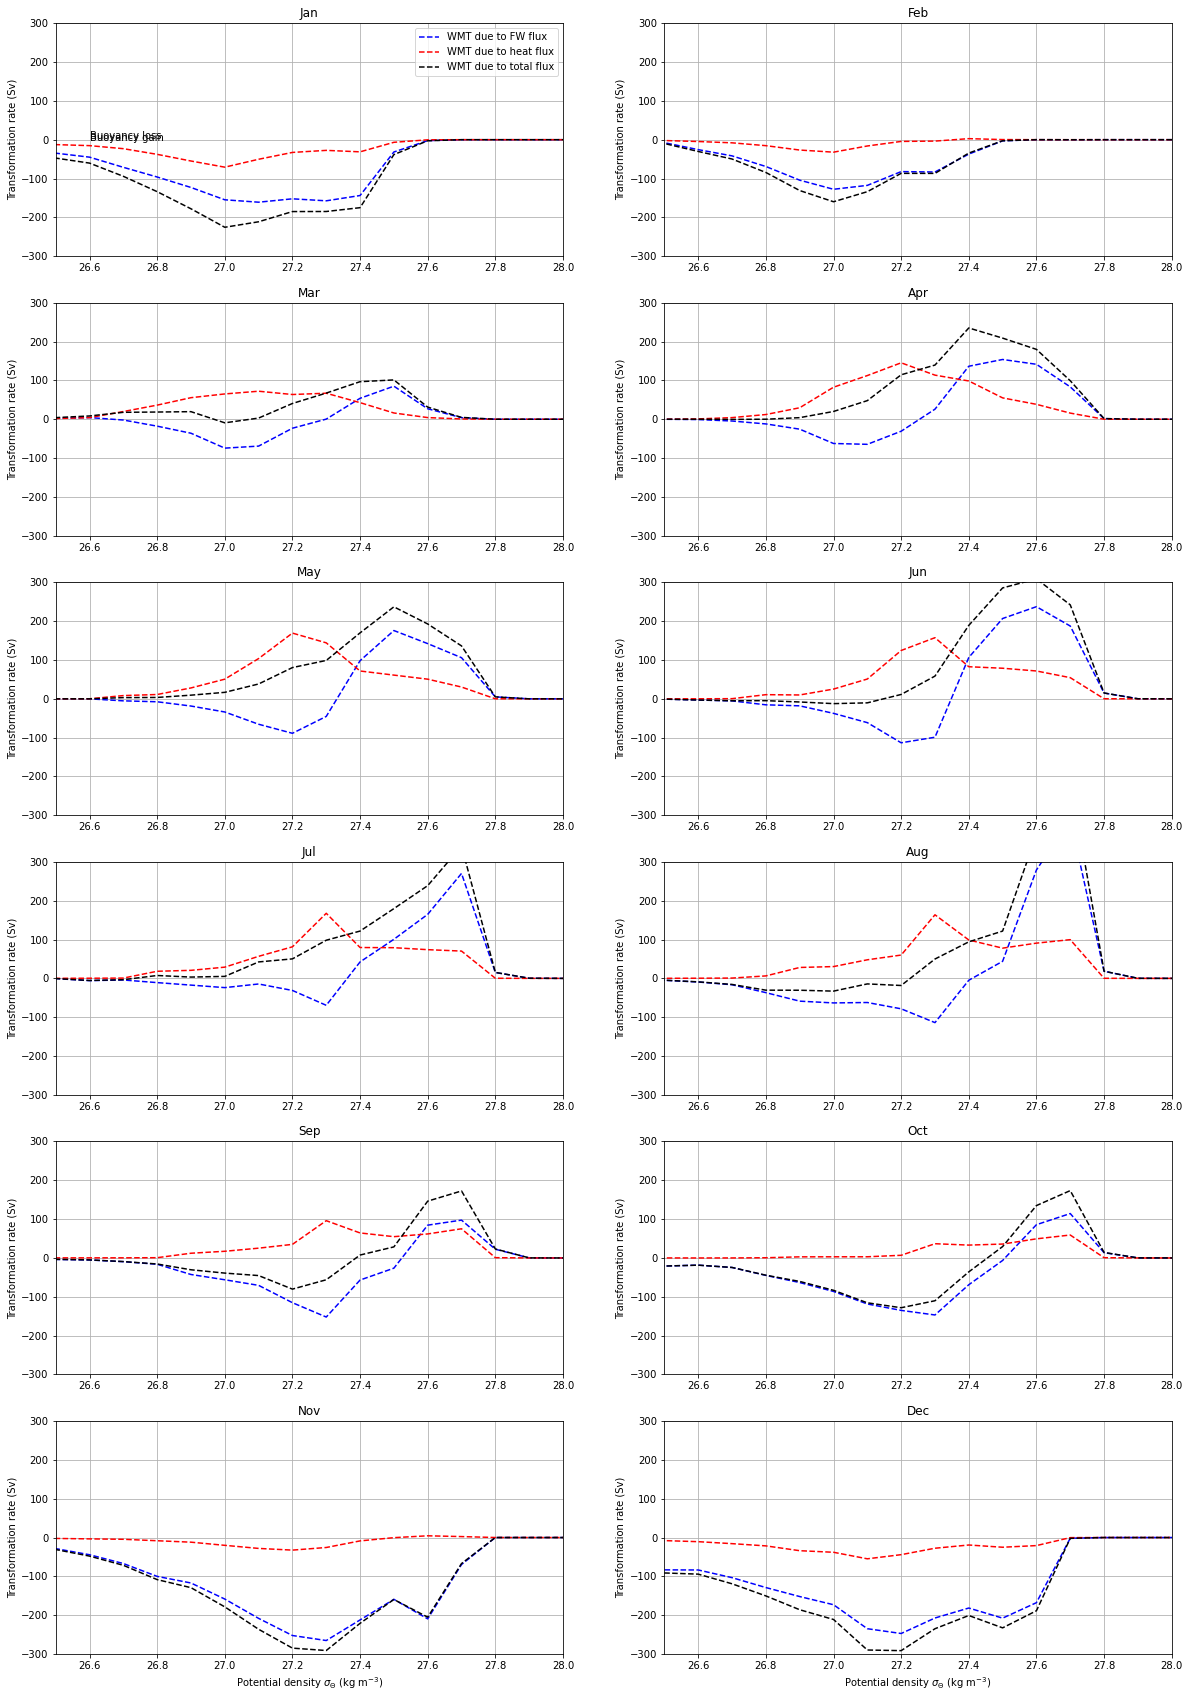

In [147]:
fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(6,2,1)
plt.title('Jan')
cs=plt.plot(rho_grid,Ff_sig_sfc_mm[:,0],'--b',label='WMT due to FW flux')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,0],'--r',label='WMT due to heat flux')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,0],'--k',label='WMT due to total flux')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax2 = fig.add_subplot(6,2,2)
plt.title('Feb')
cs=plt.plot(rho_grid,Ff_sig_sfc_mm[:,1],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,1],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,1],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax3 = fig.add_subplot(6,2,3)
plt.title('Mar')
cs=plt.plot(rho_grid,Ff_sig_sfc_mm[:,2],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,2],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,2],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax4 = fig.add_subplot(6,2,4)
plt.title('Apr')
cs=plt.plot(rho_grid,Ff_sig_sfc_mm[:,3],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,3],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,3],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax5 = fig.add_subplot(6,2,5)
plt.title('May')
cs=plt.plot(rho_grid,Ff_sig_sfc_mm[:,4],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,4],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,4],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax6 = fig.add_subplot(6,2,6)
plt.title('Jun')
cs=plt.plot(rho_grid,Ff_sig_sfc_mm[:,5],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,5],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,5],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax7 = fig.add_subplot(6,2,7)
plt.title('Jul')
cs=plt.plot(rho_grid,Ff_sig_sfc_mm[:,6],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,6],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,6],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax8 = fig.add_subplot(6,2,8)
plt.title('Aug')
cs=plt.plot(rho_grid,Ff_sig_sfc_mm[:,7],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,7],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,7],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax9 = fig.add_subplot(6,2,9)
plt.title('Sep')
cs=plt.plot(rho_grid,Ff_sig_sfc_mm[:,8],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,8],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,8],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax10 = fig.add_subplot(6,2,10)
plt.title('Oct')
cs=plt.plot(rho_grid,Ff_sig_sfc_mm[:,9],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,9],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,9],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax11 = fig.add_subplot(6,2,11)
plt.title('Nov')
cs=plt.plot(rho_grid,Ff_sig_sfc_mm[:,10],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,10],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,10],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax12 = fig.add_subplot(6,2,12)
plt.title('Dec')
cs=plt.plot(rho_grid,Ff_sig_sfc_mm[:,11],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,11],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,11],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)


name_fig="waom10extend_shflim_S_0.25Q_WMT_sfc_monthly_yr21.png"
plt.savefig(fig_path + name_fig, dpi=300)

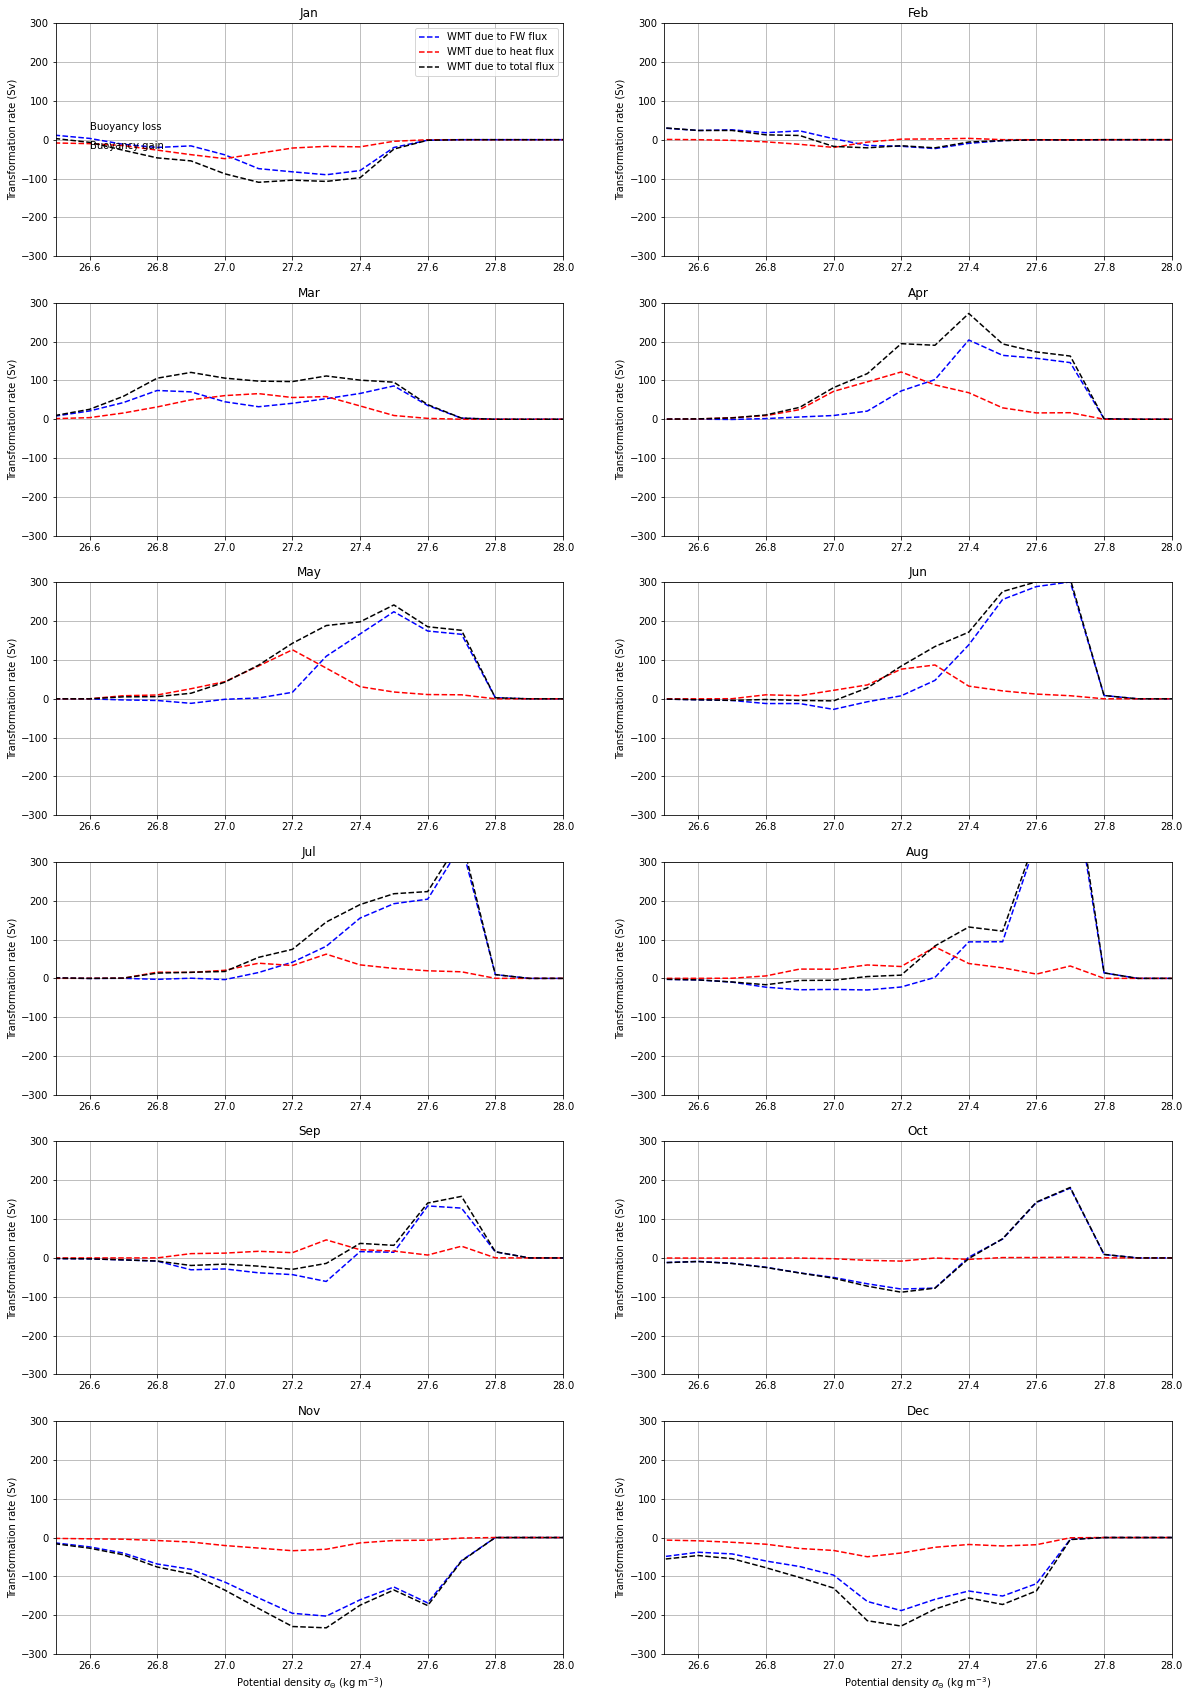

In [148]:
fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(6,2,1)
plt.title('Jan')
cs=plt.plot(rho_grid,Ff_sig_diff_vint_mm[:,0],'--b',label='WMT due to FW flux')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,0],'--r',label='WMT due to heat flux')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,0],'--k',label='WMT due to total flux')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)
plt.text(26.6,25,'Buoyancy loss')
plt.text(26.6,-25,'Buoyancy gain')

ax2 = fig.add_subplot(6,2,2)
plt.title('Feb')
cs=plt.plot(rho_grid,Ff_sig_diff_vint_mm[:,1],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,1],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,1],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax3 = fig.add_subplot(6,2,3)
plt.title('Mar')
cs=plt.plot(rho_grid,Ff_sig_diff_vint_mm[:,2],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,2],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,2],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax4 = fig.add_subplot(6,2,4)
plt.title('Apr')
cs=plt.plot(rho_grid,Ff_sig_diff_vint_mm[:,3],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,3],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,3],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax5 = fig.add_subplot(6,2,5)
plt.title('May')
cs=plt.plot(rho_grid,Ff_sig_diff_vint_mm[:,4],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,4],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,4],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax6 = fig.add_subplot(6,2,6)
plt.title('Jun')
cs=plt.plot(rho_grid,Ff_sig_diff_vint_mm[:,5],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,5],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,5],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax7 = fig.add_subplot(6,2,7)
plt.title('Jul')
cs=plt.plot(rho_grid,Ff_sig_diff_vint_mm[:,6],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,6],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,6],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax8 = fig.add_subplot(6,2,8)
plt.title('Aug')
cs=plt.plot(rho_grid,Ff_sig_diff_vint_mm[:,7],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,7],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,7],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax9 = fig.add_subplot(6,2,9)
plt.title('Sep')
cs=plt.plot(rho_grid,Ff_sig_diff_vint_mm[:,8],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,8],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,8],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax10 = fig.add_subplot(6,2,10)
plt.title('Oct')
cs=plt.plot(rho_grid,Ff_sig_diff_vint_mm[:,9],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,9],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,9],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax11 = fig.add_subplot(6,2,11)
plt.title('Nov')
cs=plt.plot(rho_grid,Ff_sig_diff_vint_mm[:,10],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,10],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,10],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax12 = fig.add_subplot(6,2,12)
plt.title('Dec')
cs=plt.plot(rho_grid,Ff_sig_diff_vint_mm[:,11],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,11],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,11],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)


name_fig="waom10extend_shflim_S_0.25Q_WMT_diff_vint_monthly_yr21.png"
plt.savefig(fig_path + name_fig, dpi=300)

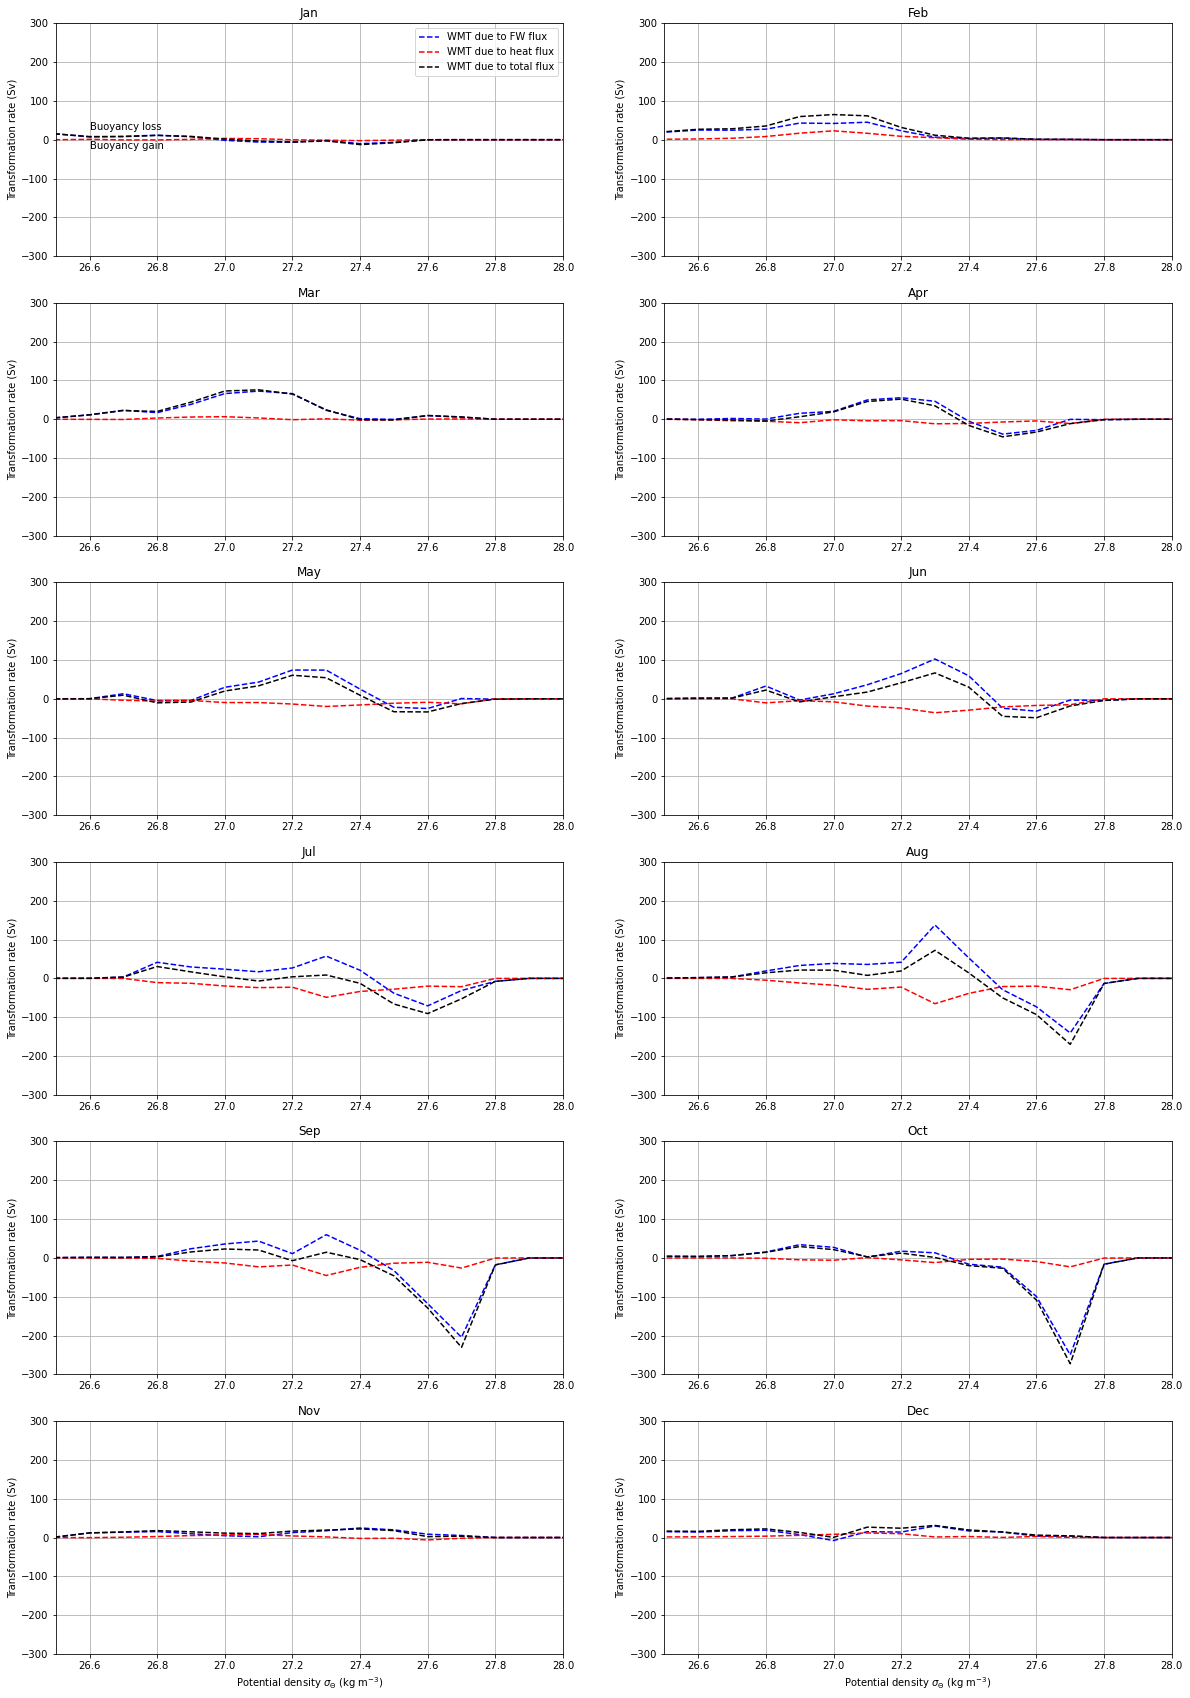

In [149]:
fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(6,2,1)
plt.title('Jan')
cs=plt.plot(rho_grid,Ff_sig_adv_vint_mm[:,0],'--b',label='WMT due to FW flux')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,0],'--r',label='WMT due to heat flux')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,0],'--k',label='WMT due to total flux')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)
plt.text(26.6,25,'Buoyancy loss')
plt.text(26.6,-25,'Buoyancy gain')

ax2 = fig.add_subplot(6,2,2)
plt.title('Feb')
cs=plt.plot(rho_grid,Ff_sig_adv_vint_mm[:,1],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,1],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,1],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax3 = fig.add_subplot(6,2,3)
plt.title('Mar')
cs=plt.plot(rho_grid,Ff_sig_adv_vint_mm[:,2],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,2],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,2],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax4 = fig.add_subplot(6,2,4)
plt.title('Apr')
cs=plt.plot(rho_grid,Ff_sig_adv_vint_mm[:,3],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,3],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,3],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax5 = fig.add_subplot(6,2,5)
plt.title('May')
cs=plt.plot(rho_grid,Ff_sig_adv_vint_mm[:,4],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,4],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,4],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax6 = fig.add_subplot(6,2,6)
plt.title('Jun')
cs=plt.plot(rho_grid,Ff_sig_adv_vint_mm[:,5],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,5],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,5],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax7 = fig.add_subplot(6,2,7)
plt.title('Jul')
cs=plt.plot(rho_grid,Ff_sig_adv_vint_mm[:,6],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,6],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,6],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax8 = fig.add_subplot(6,2,8)
plt.title('Aug')
cs=plt.plot(rho_grid,Ff_sig_adv_vint_mm[:,7],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,7],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,7],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax9 = fig.add_subplot(6,2,9)
plt.title('Sep')
cs=plt.plot(rho_grid,Ff_sig_adv_vint_mm[:,8],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,8],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,8],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax10 = fig.add_subplot(6,2,10)
plt.title('Oct')
cs=plt.plot(rho_grid,Ff_sig_adv_vint_mm[:,9],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,9],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,9],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax11 = fig.add_subplot(6,2,11)
plt.title('Nov')
cs=plt.plot(rho_grid,Ff_sig_adv_vint_mm[:,10],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,10],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,10],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax12 = fig.add_subplot(6,2,12)
plt.title('Dec')
cs=plt.plot(rho_grid,Ff_sig_adv_vint_mm[:,11],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,11],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,11],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)


name_fig="waom10extend_shflim_S_0.25Q_WMT_adv_vint_monthly_yr21.png"
plt.savefig(fig_path + name_fig, dpi=300)

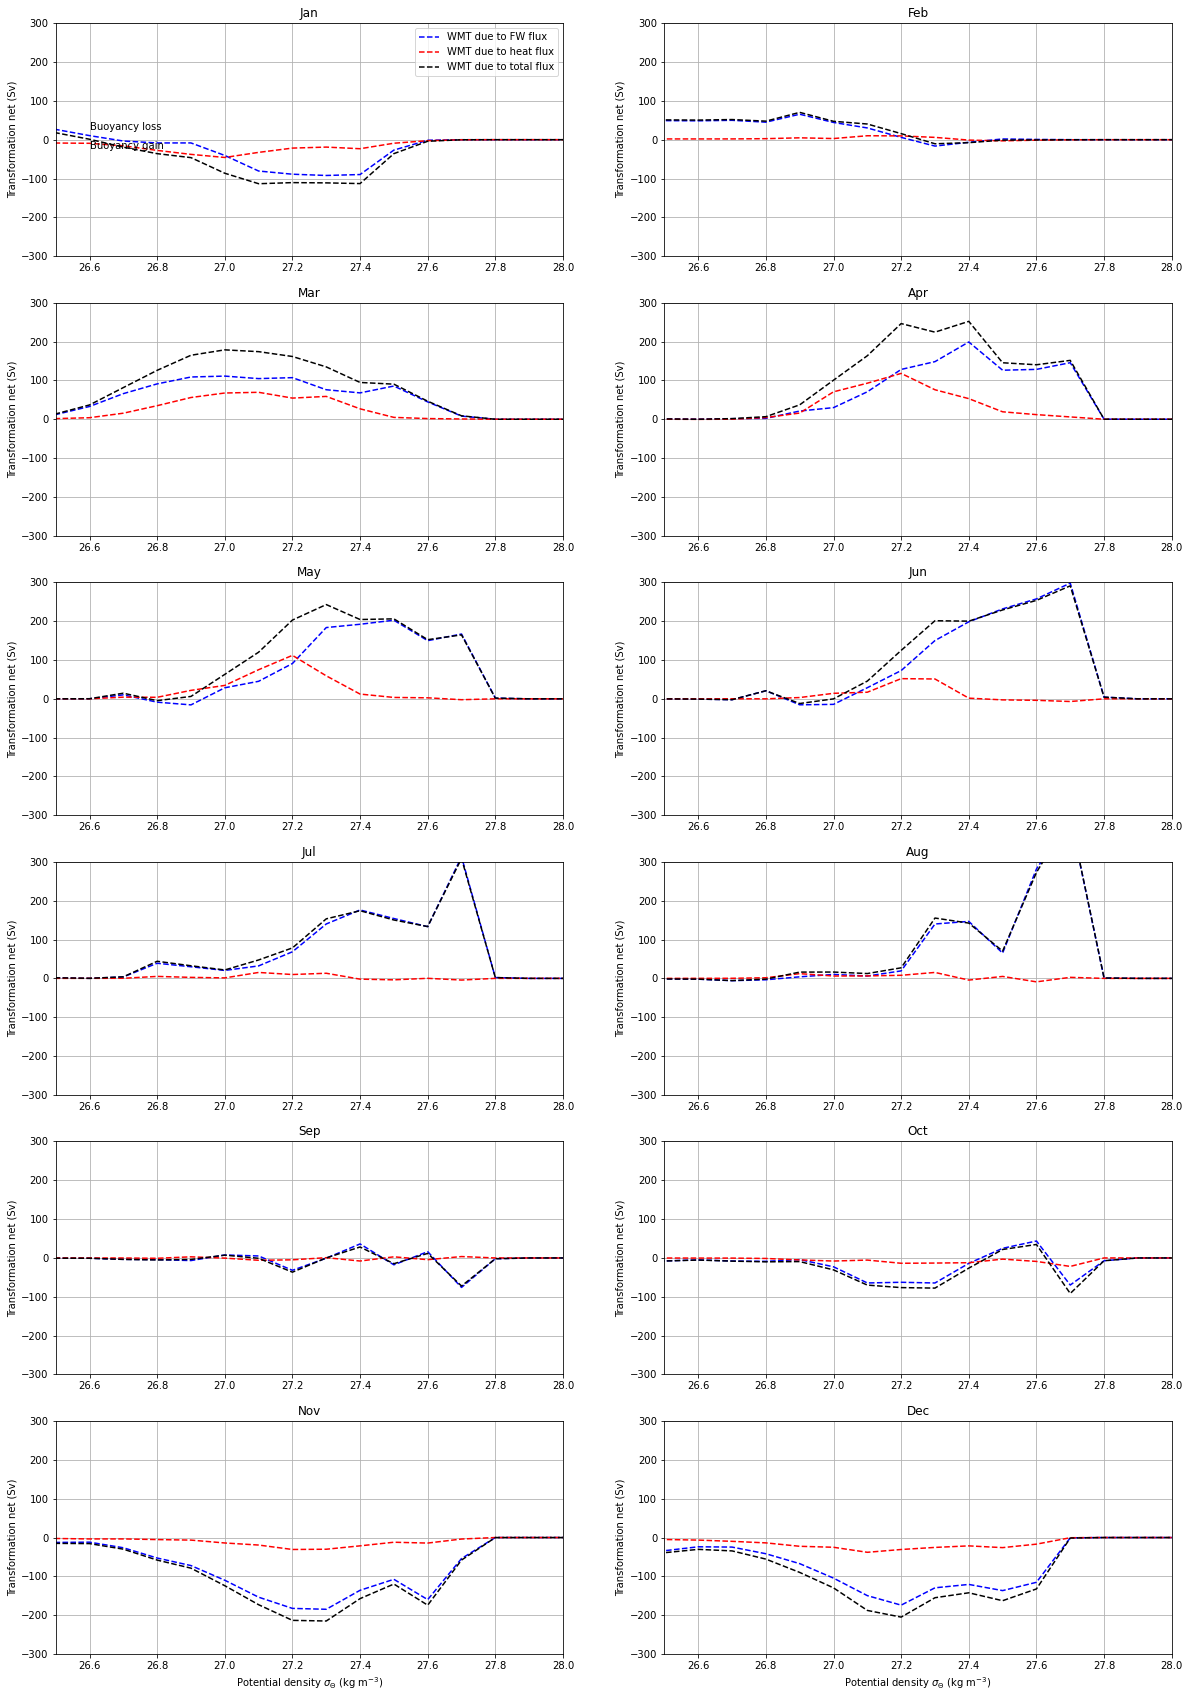

In [150]:
fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(6,2,1)
plt.title('Jan')
cs=plt.plot(rho_grid,Ff_sig_net_vint_mm[:,0],'--b',label='WMT due to FW flux')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,0],'--r',label='WMT due to heat flux')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,0],'--k',label='WMT due to total flux')
plt.legend()
plt.ylabel('Transformation net (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)
plt.text(26.6,25,'Buoyancy loss')
plt.text(26.6,-25,'Buoyancy gain')

ax2 = fig.add_subplot(6,2,2)
plt.title('Feb')
cs=plt.plot(rho_grid,Ff_sig_net_vint_mm[:,1],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,1],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,1],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax3 = fig.add_subplot(6,2,3)
plt.title('Mar')
cs=plt.plot(rho_grid,Ff_sig_net_vint_mm[:,2],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,2],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,2],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax4 = fig.add_subplot(6,2,4)
plt.title('Apr')
cs=plt.plot(rho_grid,Ff_sig_net_vint_mm[:,3],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,3],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,3],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax5 = fig.add_subplot(6,2,5)
plt.title('May')
cs=plt.plot(rho_grid,Ff_sig_net_vint_mm[:,4],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,4],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,4],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax6 = fig.add_subplot(6,2,6)
plt.title('Jun')
cs=plt.plot(rho_grid,Ff_sig_net_vint_mm[:,5],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,5],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,5],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax7 = fig.add_subplot(6,2,7)
plt.title('Jul')
cs=plt.plot(rho_grid,Ff_sig_net_vint_mm[:,6],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,6],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,6],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax8 = fig.add_subplot(6,2,8)
plt.title('Aug')
cs=plt.plot(rho_grid,Ff_sig_net_vint_mm[:,7],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,7],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,7],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax9 = fig.add_subplot(6,2,9)
plt.title('Sep')
cs=plt.plot(rho_grid,Ff_sig_net_vint_mm[:,8],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,8],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,8],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax10 = fig.add_subplot(6,2,10)
plt.title('Oct')
cs=plt.plot(rho_grid,Ff_sig_net_vint_mm[:,9],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,9],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,9],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax11 = fig.add_subplot(6,2,11)
plt.title('Nov')
cs=plt.plot(rho_grid,Ff_sig_net_vint_mm[:,10],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,10],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,10],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation net (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)

ax12 = fig.add_subplot(6,2,12)
plt.title('Dec')
cs=plt.plot(rho_grid,Ff_sig_net_vint_mm[:,11],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,11],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,11],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation net (Sv)')
plt.xlim(26.5,28),plt.ylim(-300,300)
plt.grid(True)


name_fig="waom10extend_shflim_S_0.25Q_WMT_net_vint_monthly_yr21.png"
plt.savefig(fig_path + name_fig, dpi=300)

NameError: name 'total_form_fwf' is not defined

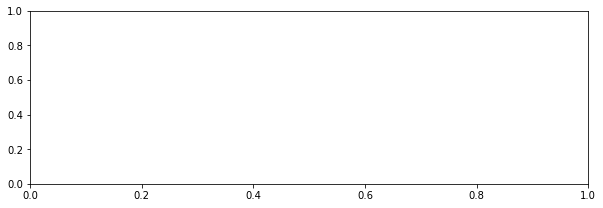

In [151]:
#rects1 = ax.bar(x - width/2, men_means, width, label='Men')

# plot with bars
width=.023

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
plt.title('')
cs=plt.bar(rho_grid + 0.0,total_form_fwf,width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf,width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form,width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)
plt.text(25.1,2.2,'Subduction')
plt.text(25.1,-2.2,'Upwelling')

name_fig="waom10extend_shflim_S_0.25Q_WMformation_ving_annual_yr21.png"
plt.savefig(fig_path + name_fig, dpi=300)

In [ ]:
fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(6,2,1)
plt.title('Jan')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,0],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,0],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,0],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)
plt.text(25.1,2.2,'Subduction')
plt.text(25.1,-2.2,'Upwelling')

ax2 = fig.add_subplot(6,2,2)
plt.title('Feb')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,1],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,1],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,1],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax3 = fig.add_subplot(6,2,3)
plt.title('Mar')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,2],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,2],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,2],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax4 = fig.add_subplot(6,2,4)
plt.title('Apr')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,3],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,3],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,3],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax5 = fig.add_subplot(6,2,5)
plt.title('May')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,4],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,4],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,4],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax6 = fig.add_subplot(6,2,6)
plt.title('Jun')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,5],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,5],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,5],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax7 = fig.add_subplot(6,2,7)
plt.title('Jul')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,6],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,6],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,6],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax8 = fig.add_subplot(6,2,8)
plt.title('Aug')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,7],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,7],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,7],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax9 = fig.add_subplot(6,2,9)
plt.title('Sep')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,8],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,8],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,8],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax10 = fig.add_subplot(6,2,10)
plt.title('Oct')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,9],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,9],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,9],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax11 = fig.add_subplot(6,2,11)
plt.title('Nov')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,10],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,10],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,10],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax12 = fig.add_subplot(6,2,12)
plt.title('Dec')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,11],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,11],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,11],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)


name_fig="waom10extend_shflim_S_0.25Q_WMformation_monthly_yr21.png"
plt.savefig(fig_path + name_fig, dpi=300)

In [152]:
for irho in np.arange(0,len(rho_grid)):
    print(irho, rho_grid[irho])

0 24.4
1 24.5
2 24.6
3 24.700000000000003
4 24.800000000000004
5 24.900000000000006
6 25.000000000000007
7 25.10000000000001
8 25.20000000000001
9 25.30000000000001
10 25.400000000000013
11 25.500000000000014
12 25.600000000000016
13 25.700000000000017
14 25.80000000000002
15 25.90000000000002
16 26.00000000000002
17 26.100000000000023
18 26.200000000000024
19 26.300000000000026
20 26.400000000000027
21 26.50000000000003
22 26.60000000000003
23 26.70000000000003
24 26.800000000000033
25 26.900000000000034
26 27.000000000000036
27 27.100000000000037
28 27.20000000000004
29 27.30000000000004
30 27.40000000000004
31 27.500000000000043
32 27.600000000000044
33 27.700000000000045
34 27.800000000000047
35 27.90000000000005
36 28.00000000000005
37 28.10000000000005
38 28.200000000000053
39 28.300000000000054
40 28.400000000000055
41 28.500000000000057
42 28.60000000000006
43 28.70000000000006
44 28.80000000000006
45 28.900000000000063
46 29.000000000000064
47 29.100000000000065


In [156]:
### plot some maps
import matplotlib.path as mpath
import cartopy.feature as cfeature

def lonlat_labels(ax):
    # latitude labels
    ax.text(120,-80,'80$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    ax.text(120,-70,'70$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    # longitude labels
    ax.text(0,-66,'0$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(60,-53,'60$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(120,-53,'120$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-60,-48,'60$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-120,-48,'120$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(180,-60,'180$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    return

proj = ccrs.SouthPolarStereo()



/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


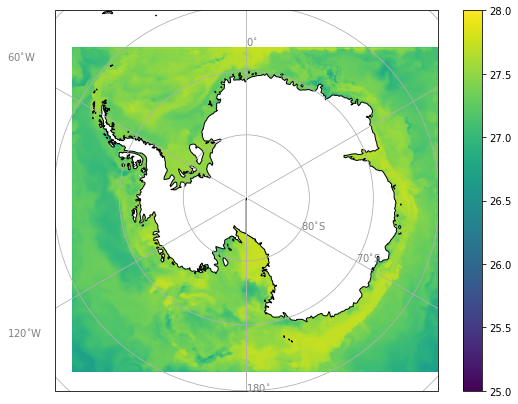

In [157]:

fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(111, projection=proj)
plt.title('')
cy=plt.pcolormesh(lon_rho,lat_rho,sigma_t[4,:,:], transform=ccrs.PlateCarree())
plt.colorbar(cy)
plt.clim(25.,28.)
ax1.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
#ax1.coastlines(resolution='110m')
lonlat_labels(ax1)
ax1.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

#plt.close()

In [161]:
# plot maps for 27.5 kg.m-3 isopycnal
#Fs_rate_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
#Fh_rate_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
print(Fs_rate_delta_net_vint_mm.shape)

Fs_rate_delta_net_vint_mm

for irho in np.arange(29,32):#15,37):

# call cartopy projection
    proj = ccrs.SouthPolarStereo()
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221, projection=proj)
    plt.title('')
    cy=plt.pcolormesh(lon_rho,lat_rho,sigma_t[4,:,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    plt.clim(25.,28.)
    ax1.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    lonlat_labels(ax1)
    ax1.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    ax2 = fig.add_subplot(222, projection=proj)
    plt.title('FWF, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolormesh(lon_rho,lat_rho,Ff_rate_delta_net_vint_mm[4,irho,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    ax2.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    lonlat_labels(ax2)
    ax2.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax2.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    ax3 = fig.add_subplot(223, projection=proj)
    plt.title('HF, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolormesh(lon_rho,lat_rho,Fh_rate_delta_net_vint_mm[4,irho,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    ax3.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    lonlat_labels(ax3)
    ax3.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax3.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    ax4 = fig.add_subplot(224, projection=proj)
    plt.title('Total, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolormesh(lon_rho,lat_rho,Fh_rate_delta_net_vint_mm[4,irho,:]+Fs_rate_delta_net_vint_mm[4,irho,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    ax4.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    lonlat_labels(ax4)
    ax4.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax4.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    name_fig="waom10extend_shflim_S_0.25Q_WMTmaps_annual_yr21_l" + str(irho)  + ".png"
    plt.savefig(fig_path + name_fig, dpi=300)
    plt.close()

(12, 48, 560, 630)


In [ ]:
# plot maps for 27.5 kg.m-3 isopycnal
#Ff_rate_mm_int[irho,mm] = np.nansum(np.nansum(Ff_rate_delta_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
#Fh_rate_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
print(Fh_rate_delta_mm.shape)

for irho in np.arange(15,37):

# call cartopy projection
    proj = ccrs.SouthPolarStereo()
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221, projection=proj)
    plt.title('')
    cy=plt.pcolor(lon_rho,lat_rho,sigma_t[4,:,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    plt.clim(25.,28.)
    ax1.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    ax1.coastlines(resolution='110m')
    lonlat_labels(ax1)
    ax1.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    ax2 = fig.add_subplot(222, projection=proj)
    plt.title('FWF, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolor(lon_rho,lat_rho,Ff_rate_delta_mm[4,irho,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    ax2.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    ax2.coastlines(resolution='110m')
    lonlat_labels(ax2)
    ax2.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax2.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    ax3 = fig.add_subplot(223, projection=proj)
    plt.title('HF, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolor(lon_rho,lat_rho,Fh_rate_delta_mm[4,irho,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    ax3.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    ax3.coastlines(resolution='110m')
    lonlat_labels(ax3)
    ax3.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax3.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    ax4 = fig.add_subplot(224, projection=proj)
    plt.title('Total, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolor(lon_rho,lat_rho,Fh_rate_delta_mm[4,irho,:]+Ff_rate_delta_mm[4,irho,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    ax4.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    ax4.coastlines(resolution='110m')
    lonlat_labels(ax4)
    ax4.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax4.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    name_fig="waom10extend_shflim_S_0.25Q_WMTmaps_annual_yr21_l" + str(irho)  + ".png"
    plt.savefig(fig_path + name_fig, dpi=300)
    plt.close()